# Hloop

In [ ]:
# Important to find data directory
import os
os.chdir('/notebooks/ana')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import seaborn as sns
import scipy
from scipy import constants
import os, sys, time, re # System Modules
from glob import glob # Readout Files in Directories

import ana
%matplotlib inline


In [3]:
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage[utf8]{inputenc}\DeclareUnicodeCharacter{2212}{-}'

## Calculate carrier concentration

$$ n = \frac{I}{e \cdot V_H} $$

Carrier concentration n = 1369288437038225.250000 1/m^2= 1.369288e+15 1/m^2 = 1.369288e+11 1/cm^2


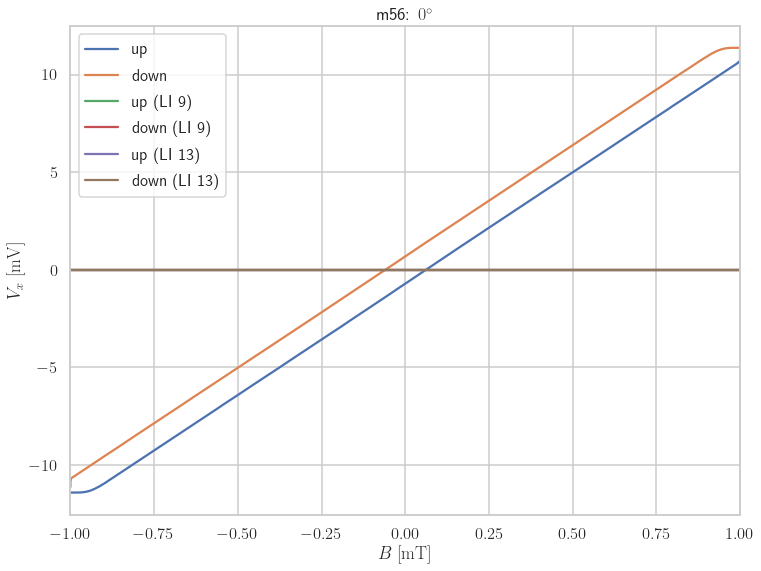

In [4]:
test_meas = ana.Hloop(56)
test_meas.set_factor(1)
test_meas.up.B /= 1e3
test_meas.down.B /= 1e3
x = test_meas.up.B[test_meas.up.B > -.950][test_meas.up.B < .950]
y = test_meas.up.Vx8[test_meas.up.B > -.950][test_meas.up.B < .950]
fit = scipy.stats.linregress(x,y)

x2 = test_meas.down.B[test_meas.down.B > -.950][test_meas.down.B < .950]
y2 = test_meas.down.Vx8[test_meas.down.B > -.950][test_meas.down.B < .950]
fit2 = scipy.stats.linregress(x2,y2)
e = constants.physical_constants['electron volt'][0]
slope = np.mean([fit.slope, fit2.slope])
I = 2.5e-6
n = I/(slope*e)
print("Carrier concentration n = %f 1/m^2= %e 1/m^2 = %e 1/cm^2" % (n,n, n*1e-4))

test_meas.set_factor(1e3)
ax = plt.figure(figsize=(12,9)).gca()
test_meas.plot_hloop(ax, show_fitted=False, show_original=True)

## Load Measurement Info (Angles)

In [5]:
df_pos2 = pd.read_csv('data/angles_info.csv', index_col=0)
df_parallel2 = pd.read_csv('data/parallel_info.csv', index_col=0)


df_together2 = pd.concat([df_pos2, df_parallel2], axis=1)
df_together2.columns = ['Plusses', 'Crosses', 'Parallel']
df_together2

Plusses  Crosses  Parallel
-90.0     155.0      0.0       NaN
-85.0     152.0    153.0       NaN
-80.0     148.0    149.0       NaN
-75.0     138.0    139.0       NaN
-70.0     134.0    136.0       NaN
-65.0     131.0    132.0       NaN
-60.0     128.0    129.0       NaN
-55.0     125.0    126.0       NaN
-50.0     122.0    123.0       NaN
-45.0     119.0    120.0       NaN
-40.0     143.0    144.0       NaN
-35.0     113.0    114.0       NaN
-30.0     110.0    111.0       NaN
-25.0     107.0    108.0       NaN
-20.0     104.0    105.0       NaN
-15.0     101.0    102.0       NaN
-10.0      98.0     99.0       NaN
-5.0       95.0     96.0       NaN
 0.0       54.0     55.0      56.0
 5.0       51.0     52.0      53.0
 10.0      48.0     49.0      50.0
 15.0      45.0     46.0      47.0
 20.0      42.0     43.0      44.0
 25.0      39.0     40.0      41.0
 30.0      36.0     37.0      38.0
 35.0      32.0     34.0      35.0
 40.0      29.0     30.0      31.0
 42.5       NaN      NaN      28.0
 45.0      23.0     22.0      24.0
 50.0      79.0     80.0       NaN
 55.0      76.0     77.0       NaN
 60.0      73.0     74.0       NaN
 65.0      70.0     71.0      72.0
 70.0      67.0     68.0      69.0
 75.0      64.0     65.0      66.0
 80.0      61.0     62.0      63.0
 85.0      58.0     59.0      60.0
 90.0      57.0      0.0      57.0
 95.0      82.0     83.0       NaN
 100.0     85.0     86.0       NaN
 105.0     88.0     89.0       NaN
 110.0     91.0     93.0       NaN

## Plot Strayfield

In [6]:
def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Source: https://jwalton.info/Matplotlib-latex-PGF/

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


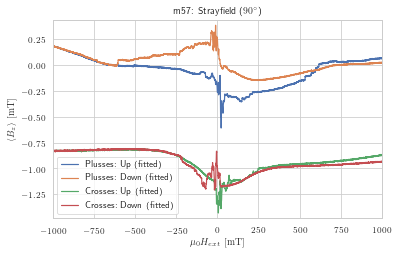

In [7]:
m = ana.Hloop(57)
m.style.set_style(default=True, size="paper")
fig, ax = plt.subplots(figsize=set_size(426))
m.plot_strayfield(ax, 'm57: Strayfield ($90^\\circ$)')
plt.savefig('90deg-stray.pgf', format='pgf')

### Measurement Plan (90deg, Noise)

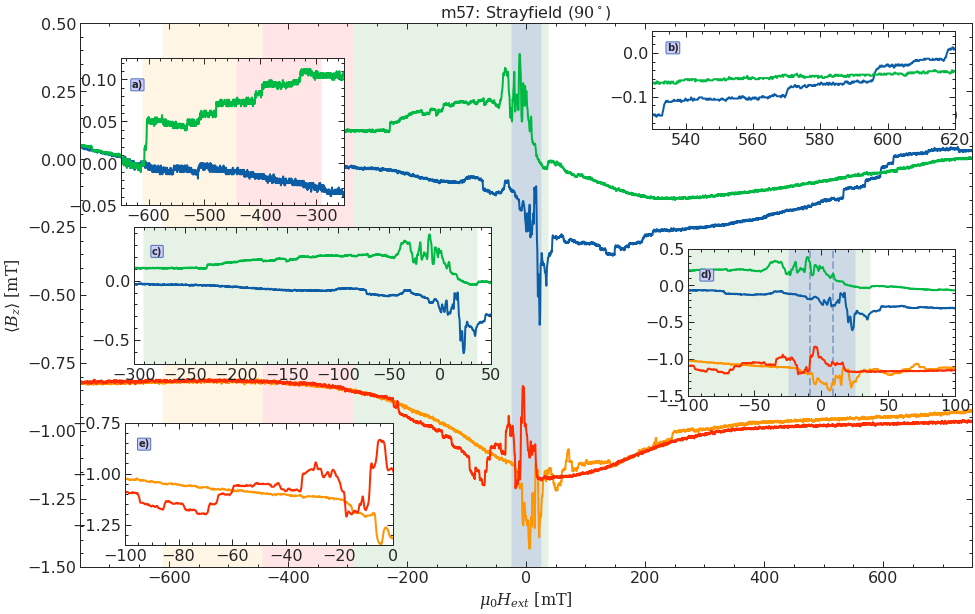

<Figure size 576x432 with 0 Axes>

In [8]:
# Set Plot Style
sns.set(context="notebook", style="ticks", palette="deep")
plt.style.use(['science', 'notebook'])


# Save figures?
save_figures = True

# Global information
figsize = (16,10) # set_size(426)
x1, x2 = -750, 750
y1, y2 = -1.5, .5
main_color = '#CCCCFF'
#m.style.set_style(size="paper")

# Inset position and limits
## Position = x_pos, y_pos, width, height
## unit of positions are in % of frame 
## x_pos, ypos points to lower left corner of inset
i1pos = .69, .3, .3, .3
i1x1, i1x2 = -100, 100
i2pos = .65, .8, .34, .2
i2x1, i2x2 = 530, 620
i2y1, i2y2 = -.175, 0.05
i3pos = .055, .65, .25, .3
i3x1, i3x2 = -650, -250
i3y1, i3y2 = -.05, .125
i4pos = .06, .03, .3, .25
i4x1, i4x2 = -100, 0
i4y1, i4y2 = -1.35, -.75
i5pos = .07, .36, .4, .28
i5x1, i5x2 = -300, 50
i5y1, i5y2 = -.7, .45

# Highlighting limits
h0range, h0color, h0alpha = 25, 'blue', .1
h1x1, h1x2, h1color, h1alpha = -611, -443, 'orange', .1
h2x1, h2x2, h2color, h2alpha = -291, -443, 'red', .1
h3x1, h3x2, h3color, h3alpha = -291.13, 36.56, 'green', .1

# Create Plot
fig, ax = plt.subplots(figsize=figsize)

# Plot hysetersis
m.plot_strayfield(ax, 'm57: Strayfield ($90^\\circ$)')

# Draw Inset 1
inset = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=i1pos,
                       bbox_transform=ax.transAxes)
# Highlight 0 / 3
inset.fill([-h0range, -h0range, h0range, h0range], [y2, y1, y1, y2], h0color, alpha=h0alpha)
inset.fill([h3x1, h3x1, h3x2, h3x2], [y2, y1, y1, y2], h3color, alpha=h3alpha)

# Highlight tertiary range
i1tert = h0range/3 # Tertiary range
inset.plot([i1tert, i1tert], [y1, y2], 'b--', alpha=.5)
inset.plot([-i1tert, -i1tert], [y1, y2], 'b--', alpha=.5)

m.plot_strayfield(inset, '$B \\in (-100, 100)$ mT', nolegend=True)
inset.set_xlim(i1x1, i1x2)
inset.set_ylim(y1, y2)

# Draw Inset 2
inset2 = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=i2pos,
                       bbox_transform=ax.transAxes)
m.plot_strayfield(inset2, '$B \\in (500, 600)$ mT', nolegend=True)
inset2.set_xlim(i2x1, i2x2)
inset2.set_ylim(i2y1, i2y2)

# Draw Inset 3
inset3 = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=i3pos,
                       bbox_transform=ax.transAxes)
m.plot_strayfield(inset3, '$B \\in (%s, %s)$ mT' % (i3x1, i3x2), nolegend=True)
inset3.set_xlim(i3x1, i3x2)
inset3.set_ylim(i3y1, i3y2)
# Highlight 1 / 2
inset3.fill([h1x1, h1x1, h1x2, h1x2], [i3y1, i3y2, i3y2, i3y1], h1color, alpha=h1alpha)
inset3.fill([h2x1, h2x1, h2x2, h2x2], [i3y1, i3y2, i3y2, i3y1], h2color, alpha=h2alpha)

# Draw Inset 4
inset4 = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=i4pos,
                       bbox_transform=ax.transAxes)
m.plot_strayfield(inset4, '$B \\in (%s, %s)$ mT' % (i4x1, i4x2), nolegend=True)
inset4.set_xlim(i4x1, i4x2)
inset4.set_ylim(i4y1, i4y2)

# Draw Inset 5
inset5 = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=i5pos,
                       bbox_transform=ax.transAxes)
m.plot_strayfield(inset5, '$B \\in (%s, %s)$ mT' % (i5x1, i5x2), nolegend=True)
inset5.set_xlim(i5x1, i5x2)
inset5.set_ylim(i5y1, i5y2)
inset5.fill([h3x1, h3x1, h3x2, h3x2], [i5y2, i5y1, i5y1, i5y2], h3color, alpha=h3alpha)

# Main Plot limits
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

# Highlight in main plot
ax.fill([-h0range, -h0range, h0range, h0range], [y1, y2, y2, y1], h0color, alpha=h0alpha)
ax.fill([h1x1, h1x1, h1x2, h1x2], [y1, y2, y2, y1], h1color, alpha=h1alpha)
ax.fill([h2x1, h2x1, h2x2, h2x2], [y1, y2, y2, y1], h2color, alpha=h2alpha)
ax.fill([h3x1, h3x1, h3x2, h3x2], [y1, y2, y2, y1], h3color, alpha=h3alpha)

# Remove x and y labels
for i, inset_ax in enumerate([inset3, inset2, inset5, inset, inset4]):
    inset_ax.set_xlabel('')
    inset_ax.set_ylabel('')
    inset_ax.set_title('')
    ann_x, ann_xx = inset_ax.get_xlim()
    ann_x += (ann_xx - ann_x)*.05
    ann_yy, ann_y = inset_ax.get_ylim()
    ann_y -= (ann_y - ann_yy)*.20
    inset_ax.text(x=ann_x, y=ann_y, s=chr(i+97) + ')', 
                  fontdict=dict(fontweight='bold', fontsize=10),
                  bbox=dict(boxstyle="round,pad=0.1", fc=main_color, ec="b", lw=1))

# Save as image (if needed)
if save_figures:
    m.style.save_plot('m57_zoomed', 'png')

### Plot All measurements

#### Compact (4 in One)

In [9]:
def get_measurement(meas, all_angles):
    for i, nr in enumerate(map(int, all_angles)):
        meas[nr] = ana.Hloop(nr)
    return meas

all_angles = df_together2.query('Crosses > 0')[['Plusses', 'Crosses']].dropna().to_numpy().ravel()
all_angles

meas = {}
meas = get_measurement(meas, all_angles)


AttributeError: 'Hloop' object has no attribute 'down'

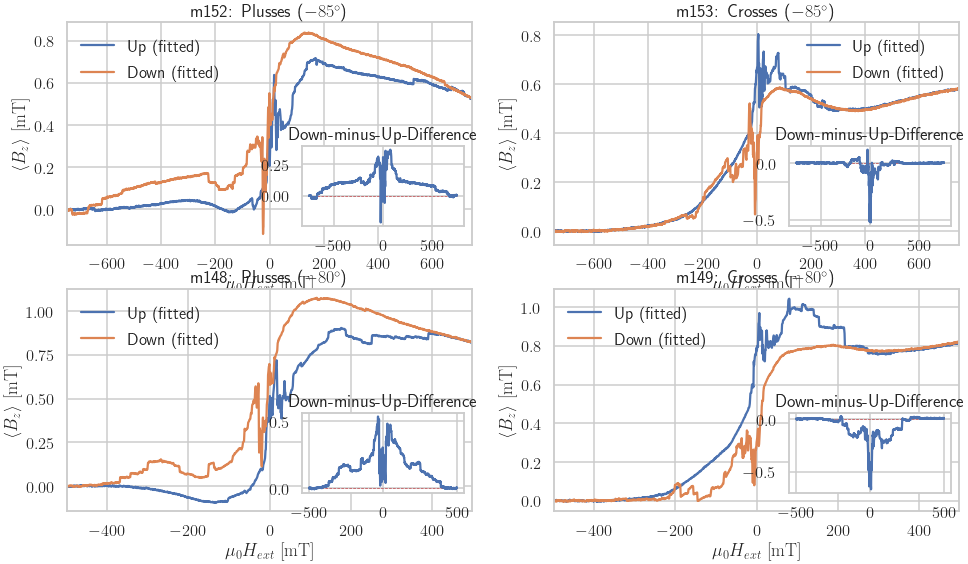

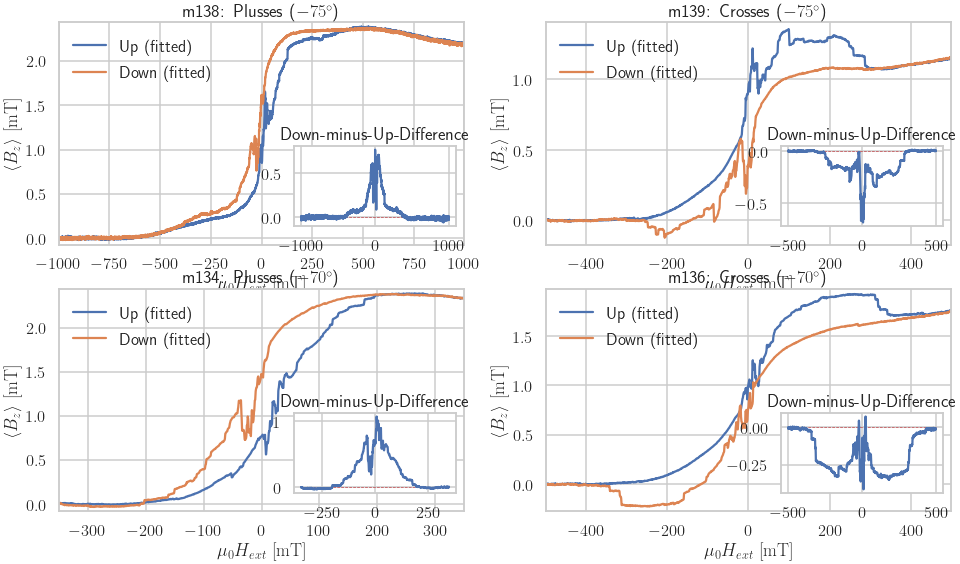

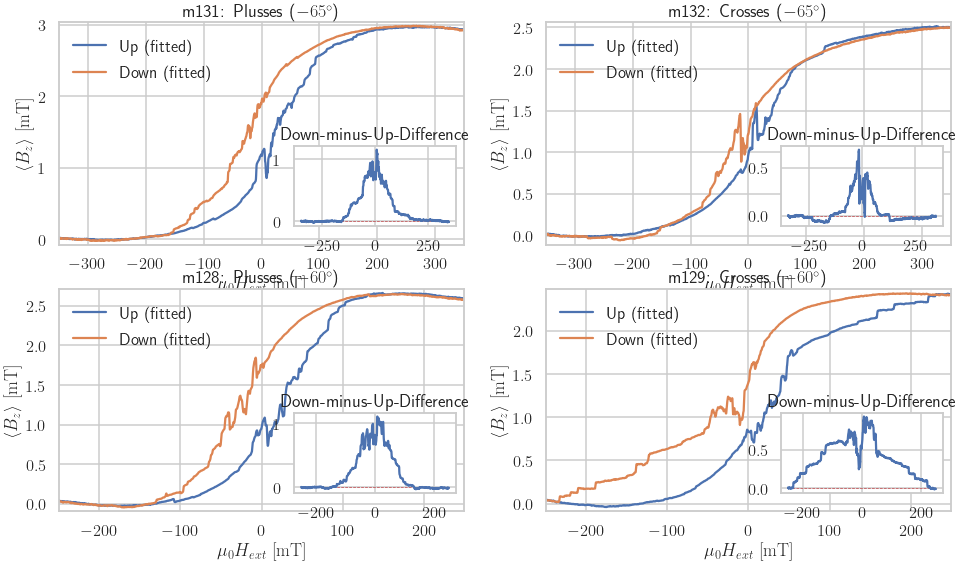

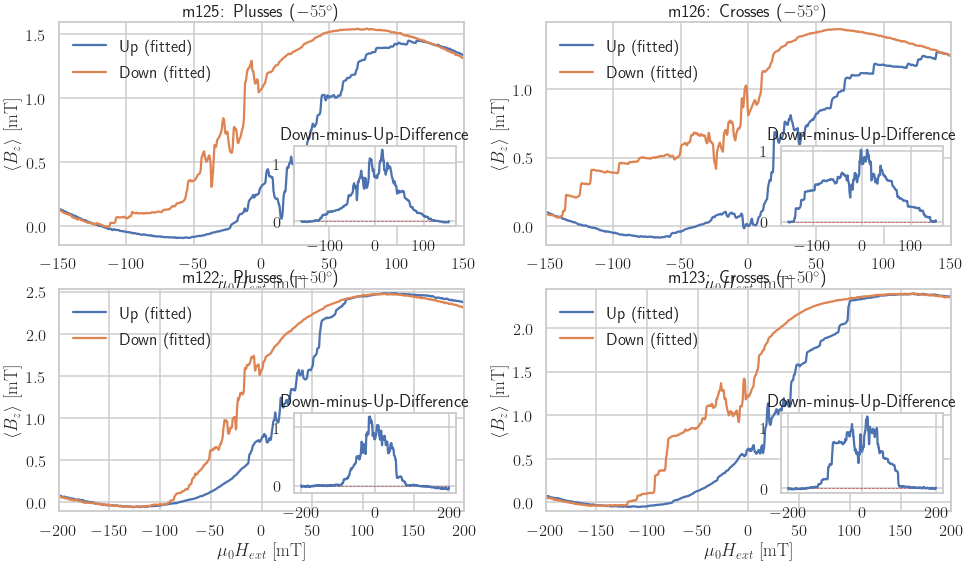

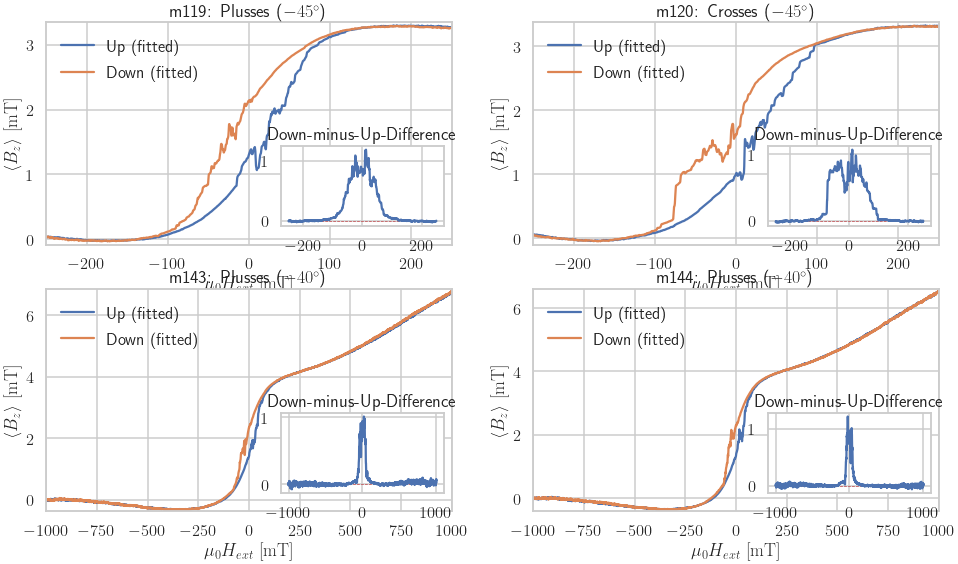

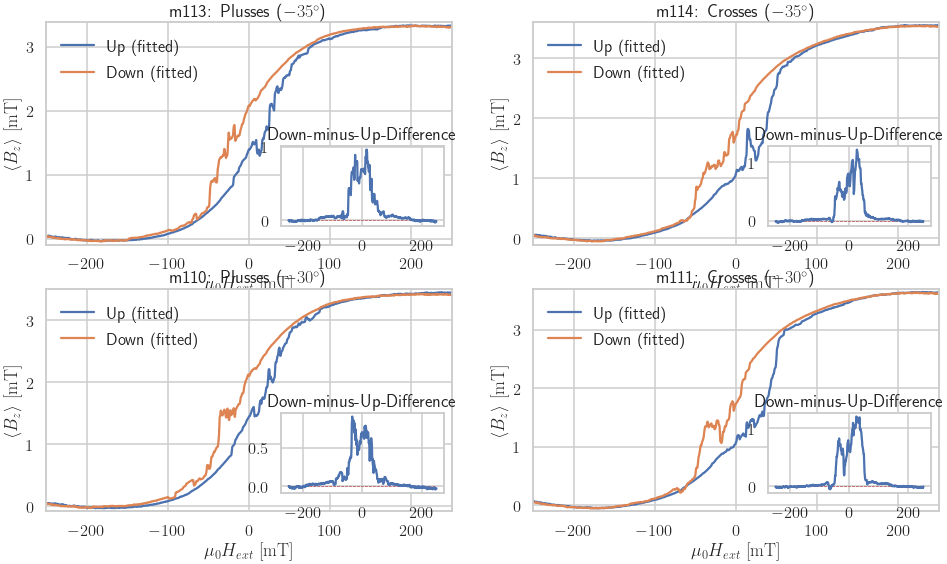

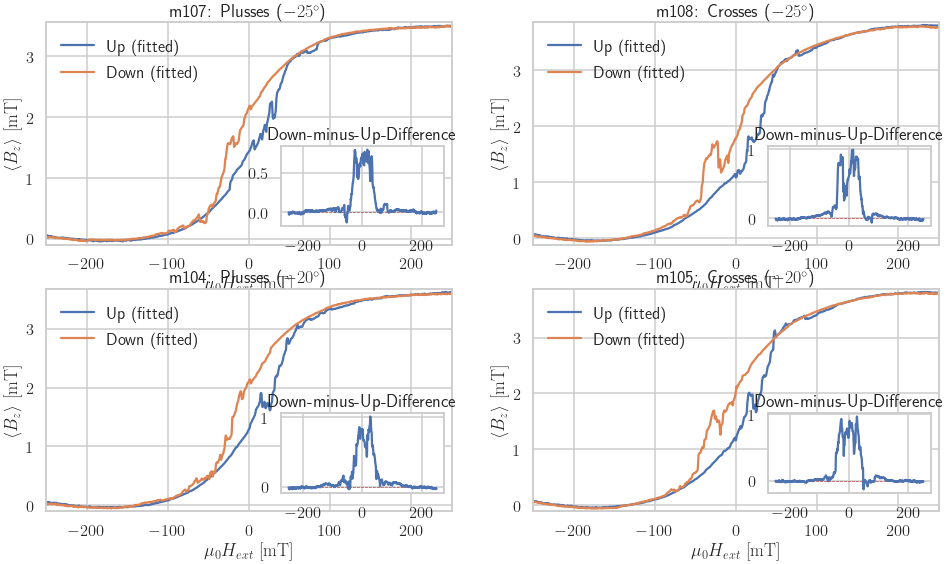

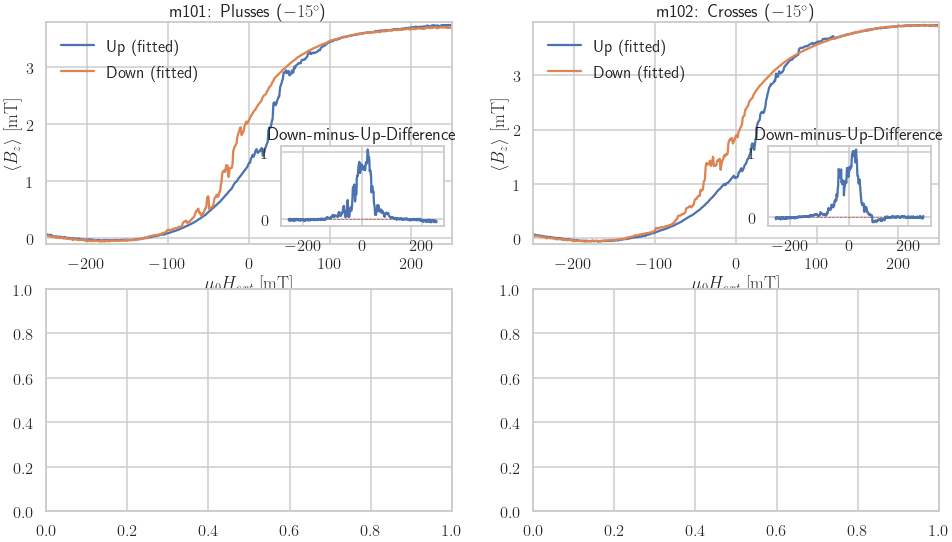

In [11]:
def plot_four_measurement(meas, all_angles, axes):
    global style
    for i, nr in enumerate(map(int, all_angles)):
        ax = axes[i//2][i%2]
        # meas[nr].get_info_from_name()
        meas[nr].style.set_style(default=True)
        meas[nr].plot_strayfield(ax)

        inset = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=(.6, .08, .4, .4),
                       bbox_transform=ax.transAxes)
        max_b = meas[nr].up.B.max()
        inset.plot([-max_b, max_b], [0, 0], 'r--', linewidth=.75)
        B_ext, B_stray = meas[nr].get_downminusup_strayfield()
        inset.plot(B_ext, B_stray)
        inset.set_title("Down-minus-Up-Difference")

    #plt.savefig('compare_all_strayfield.png')
    #plt.savefig('compare_all_strayfield.pdf')

    

for i in range(len(all_angles)//4):
    fig, axes = plt.subplots(2,2, figsize=(16,9))
    plot_four_measurement(meas, all_angles[4*i:4*i+4], axes)

#### Plot single measurements

<ipython-input-12-bfb78f2f7c96>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=(16,9))


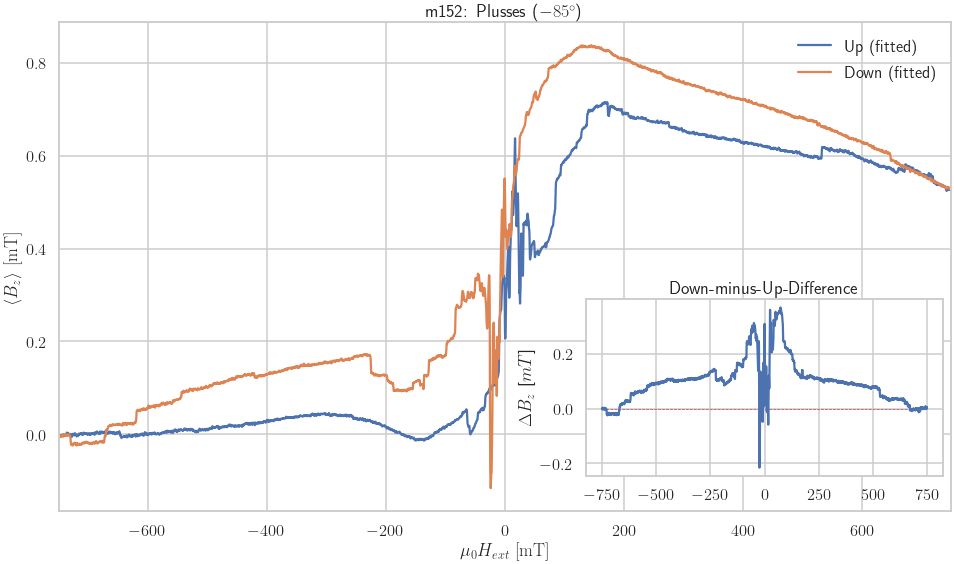

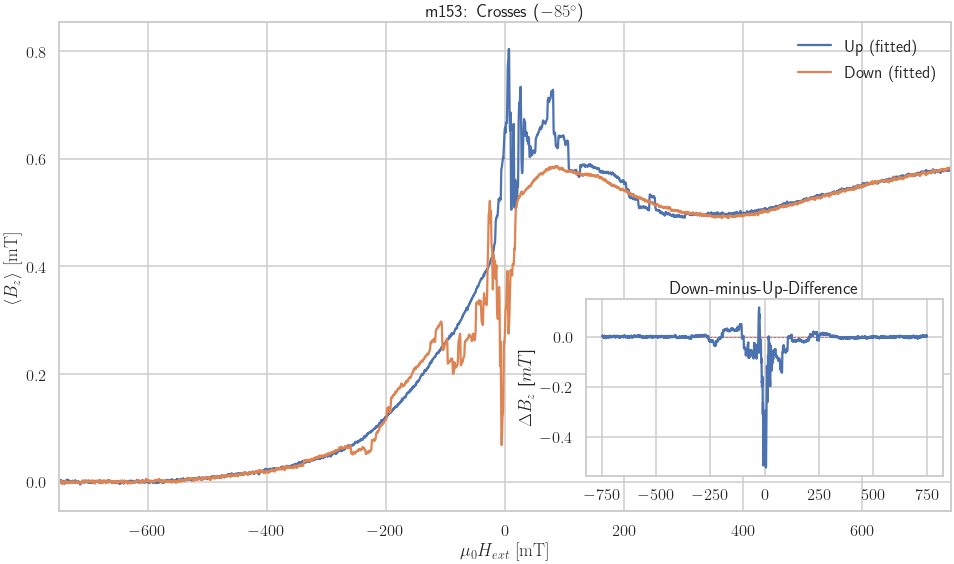

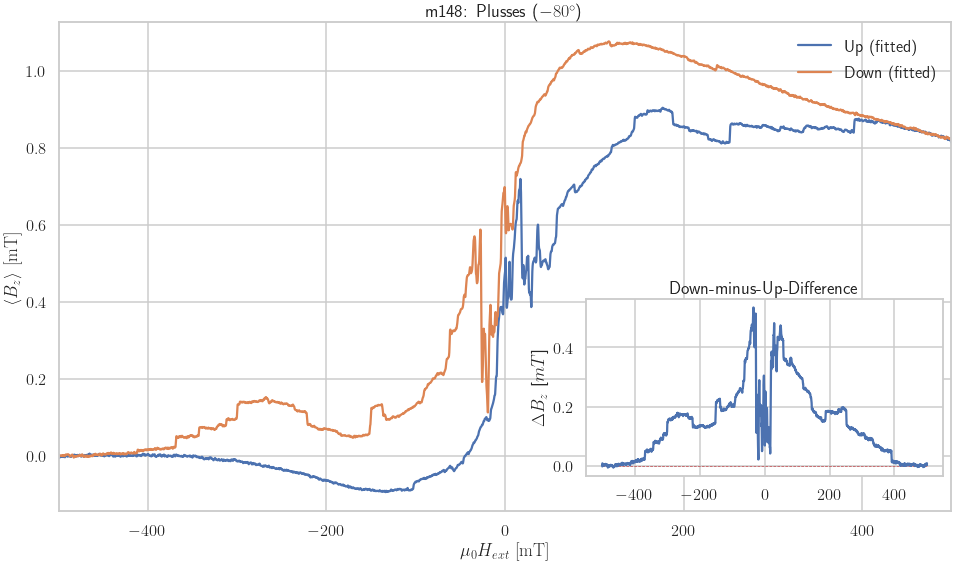

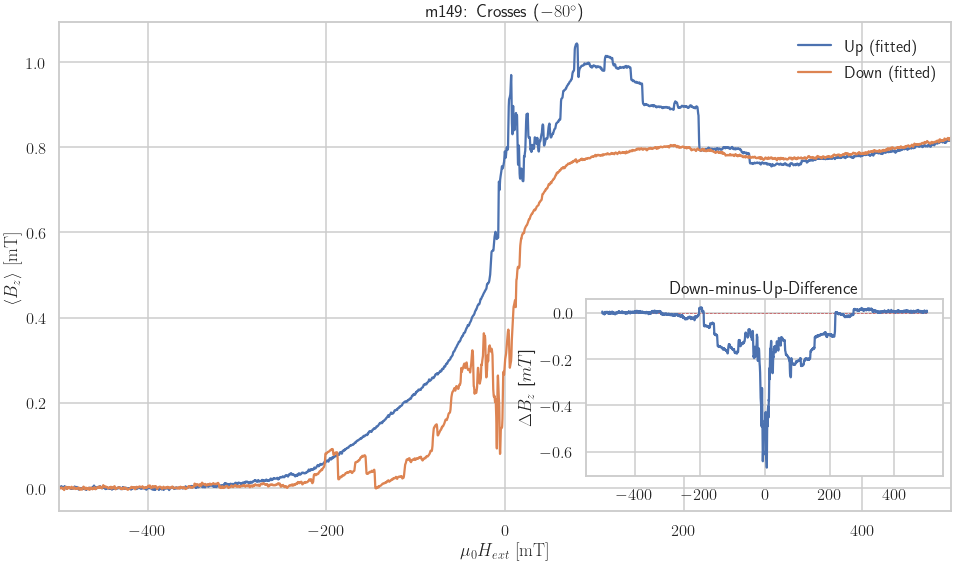

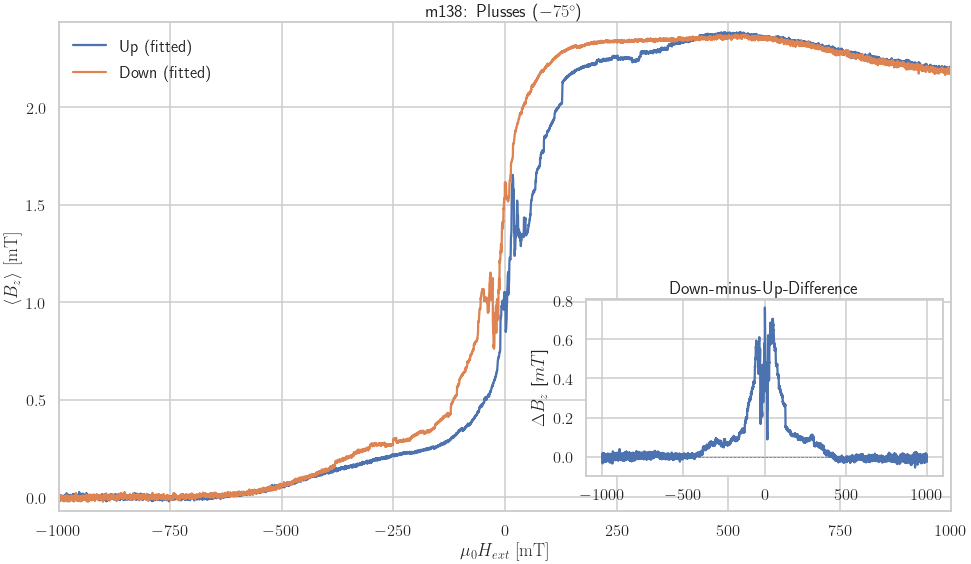

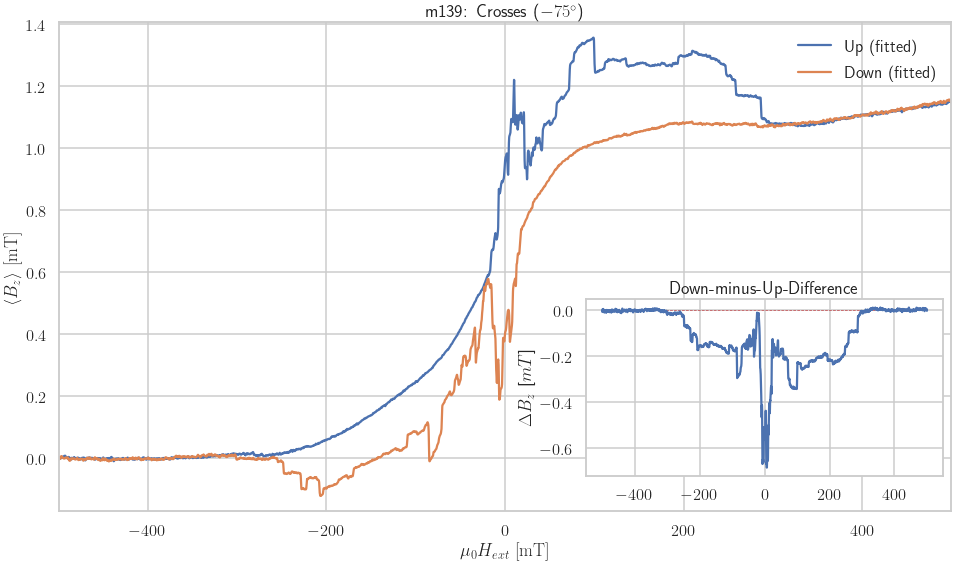

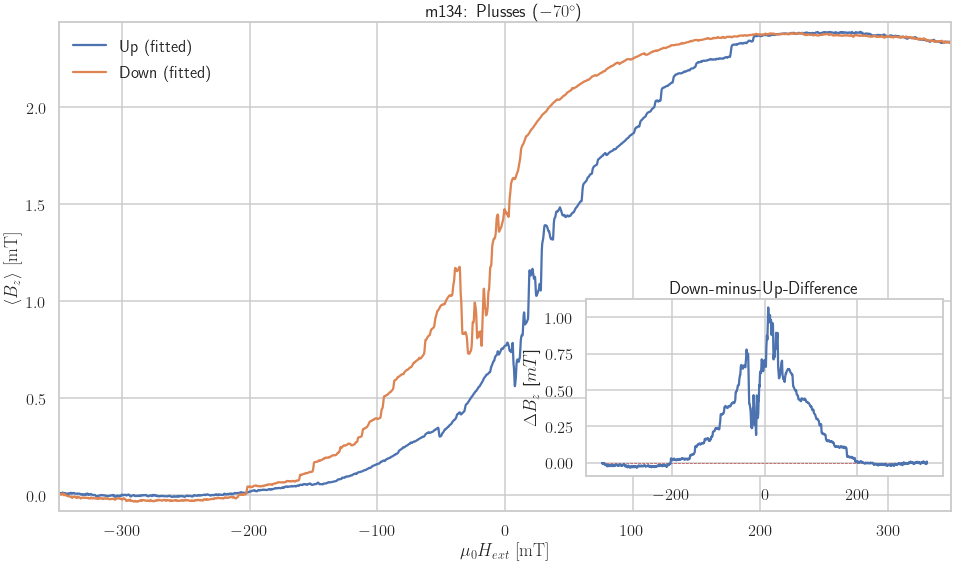

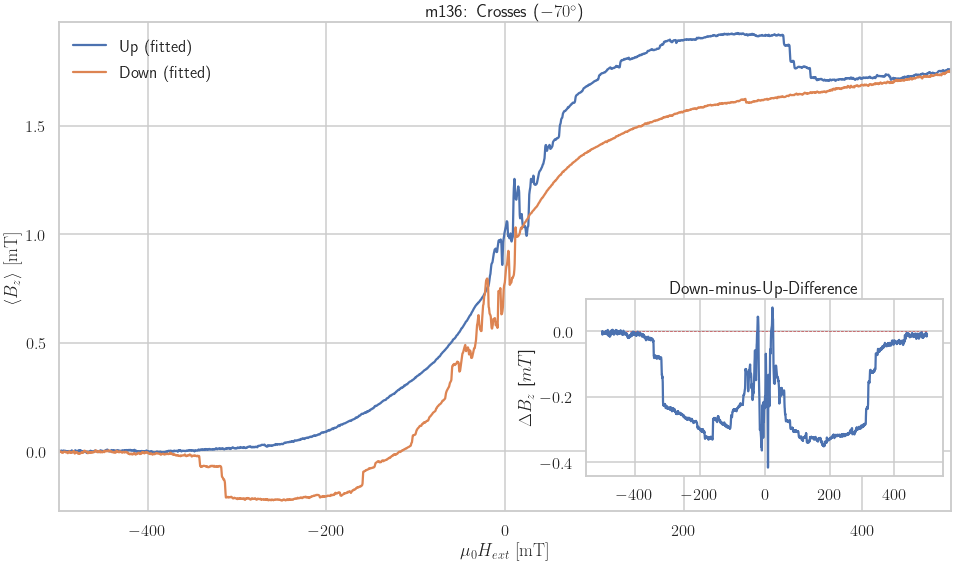

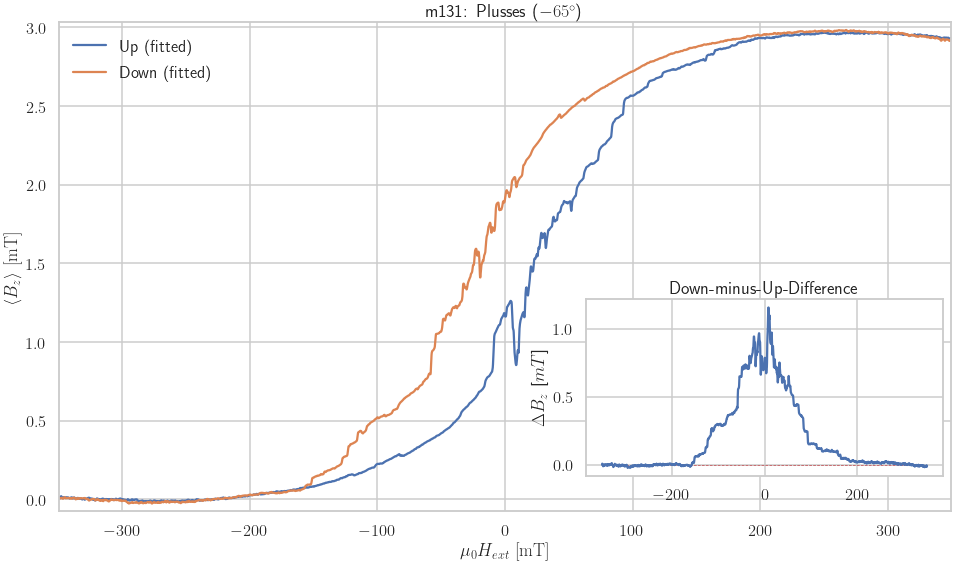

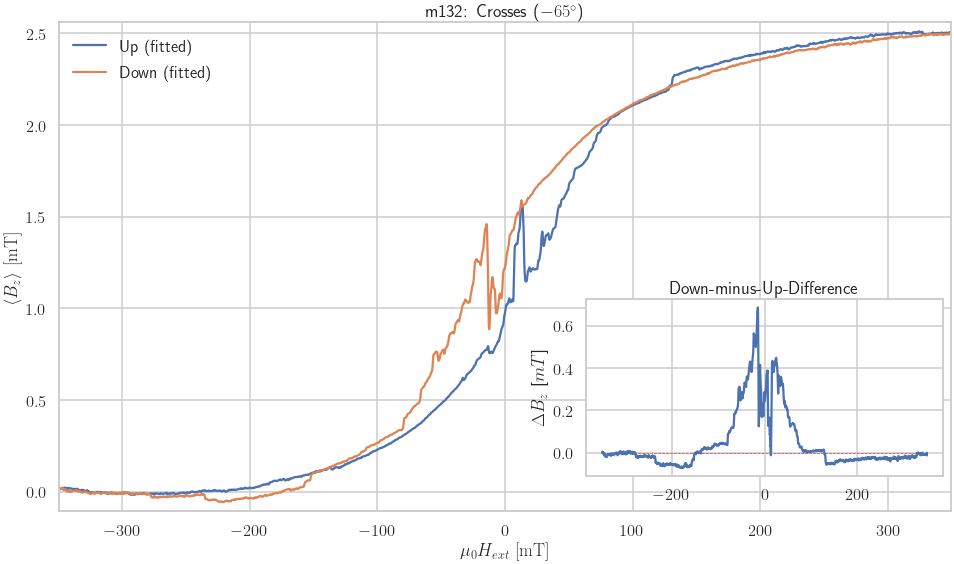

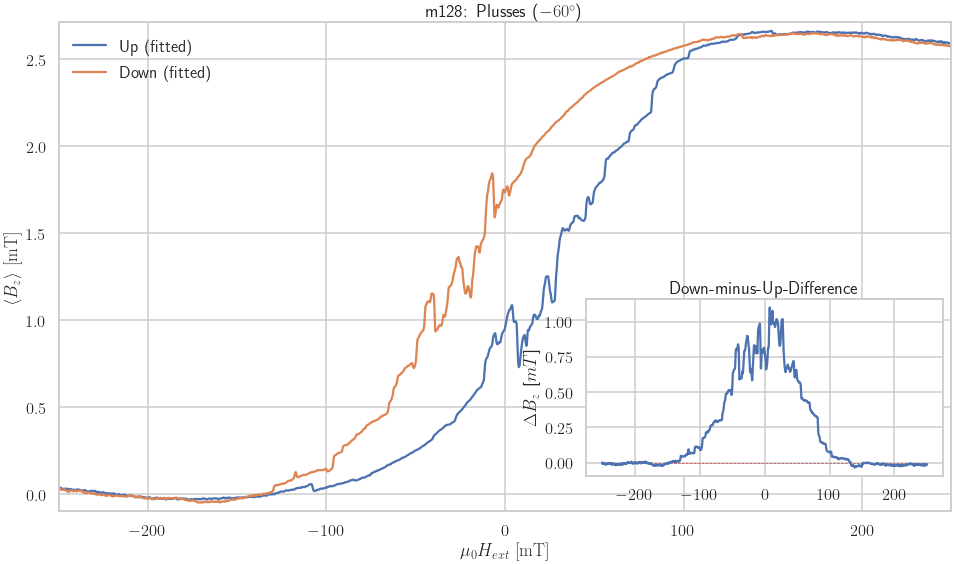

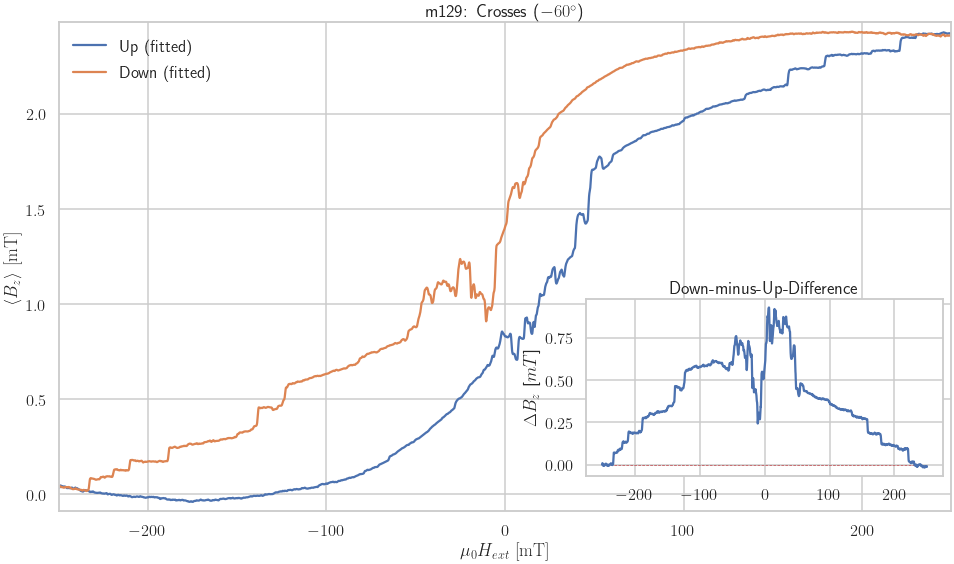

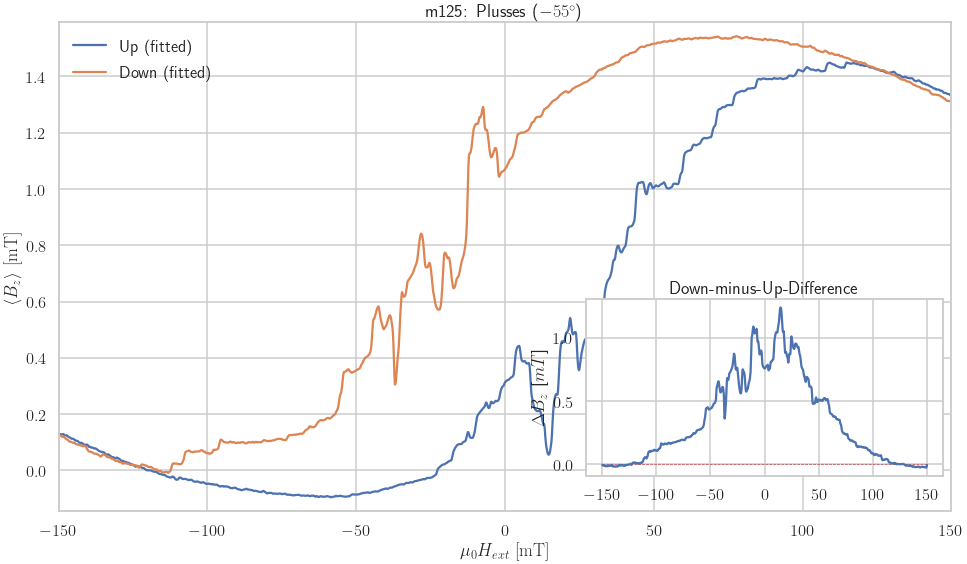

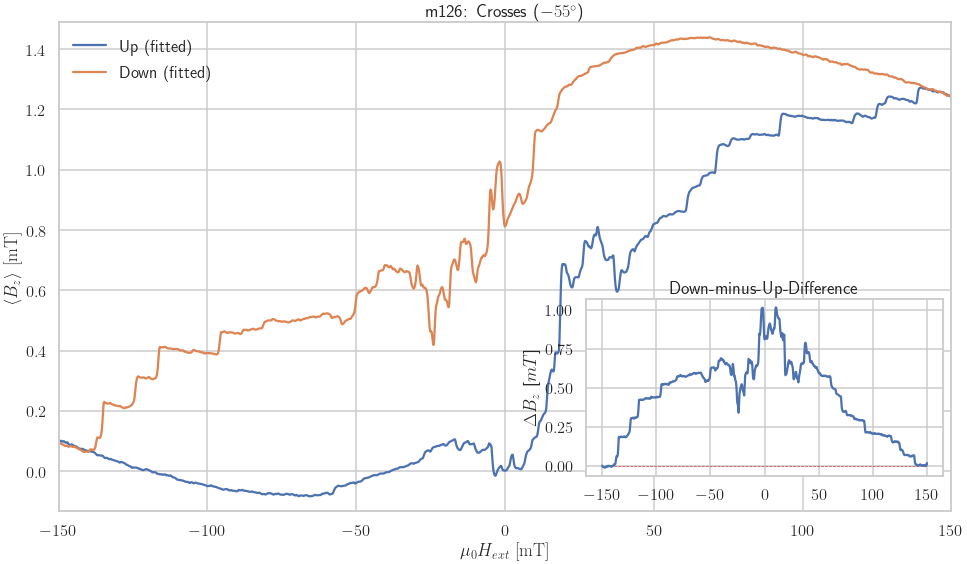

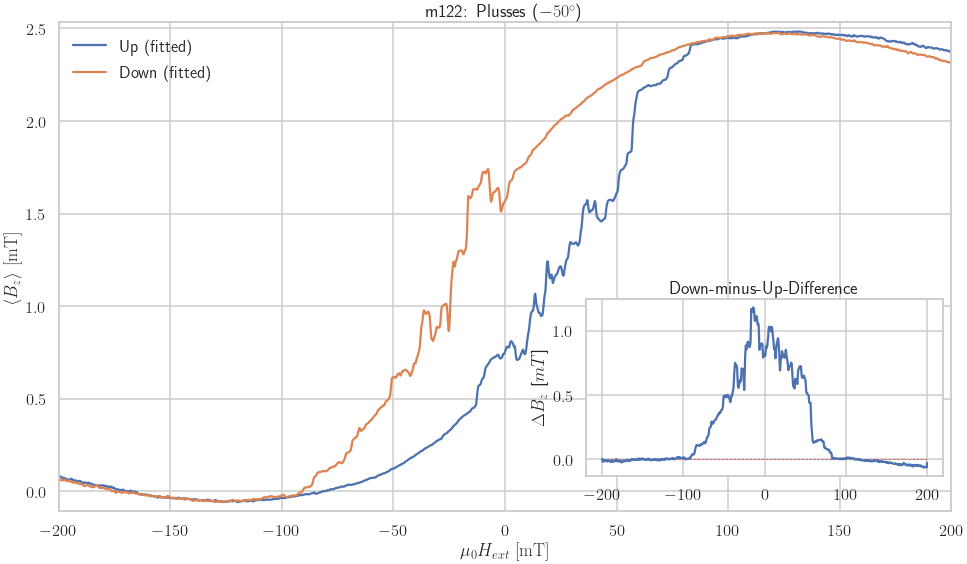

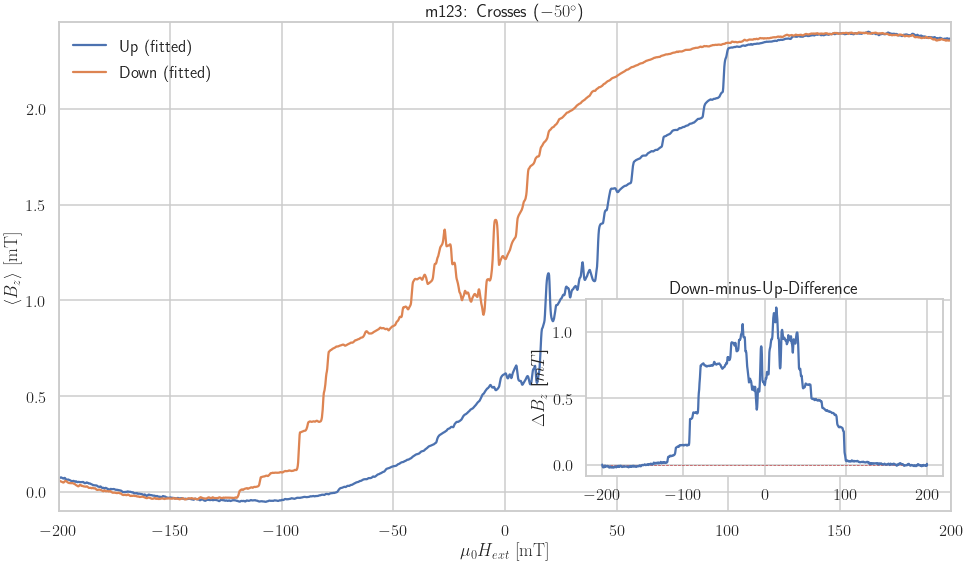

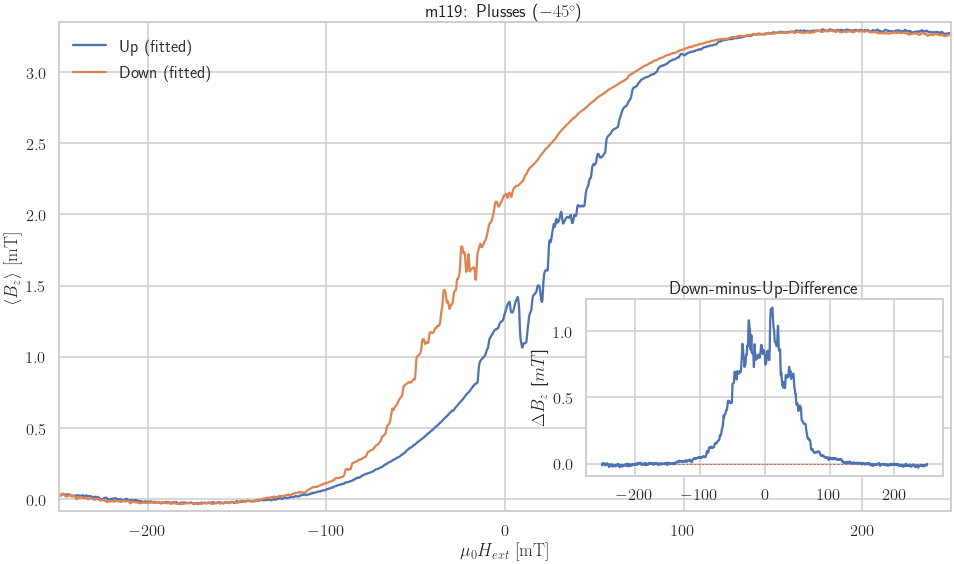

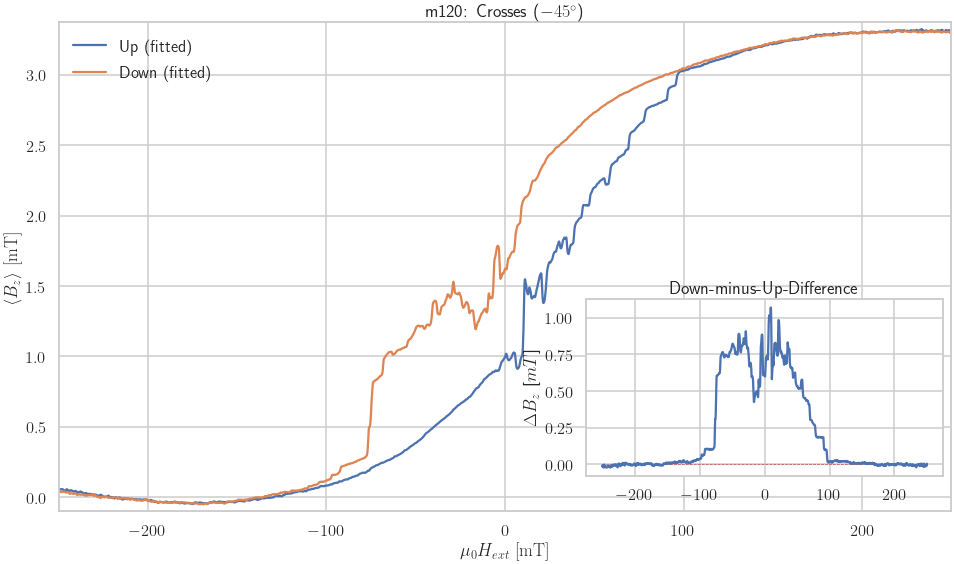

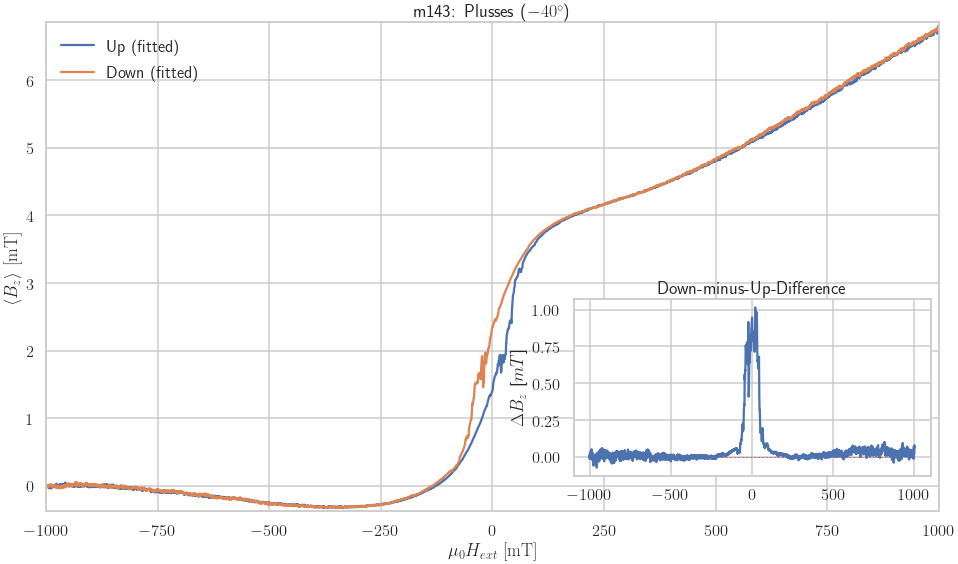

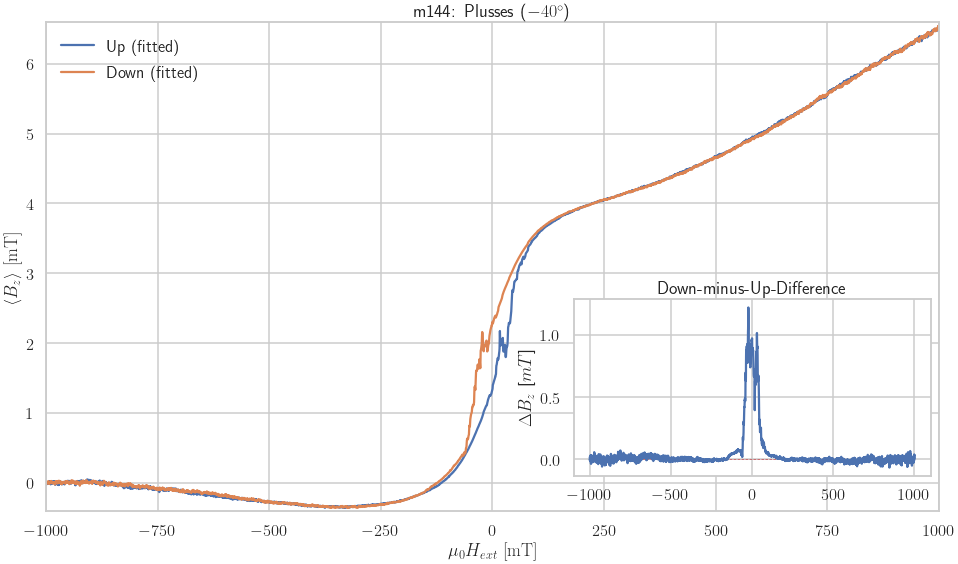

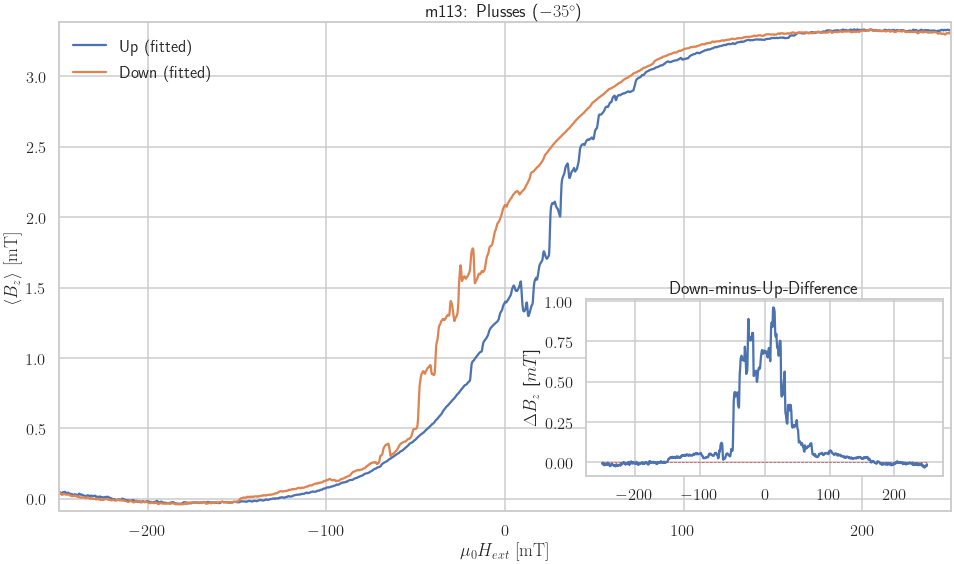

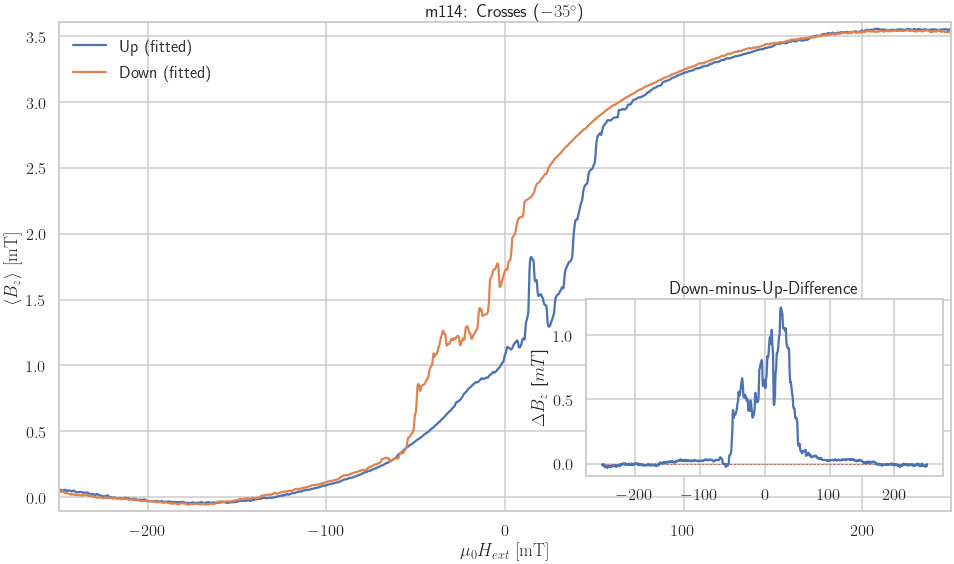

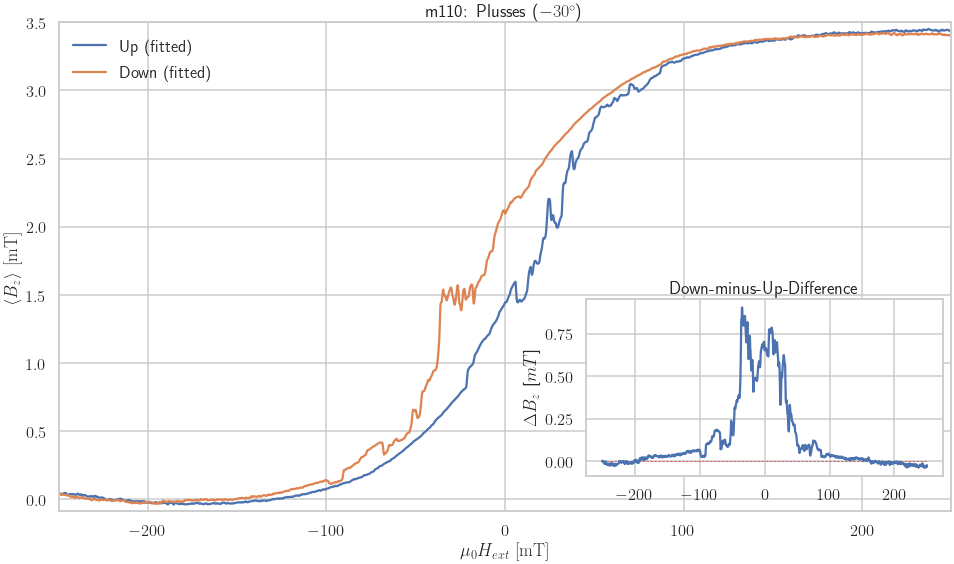

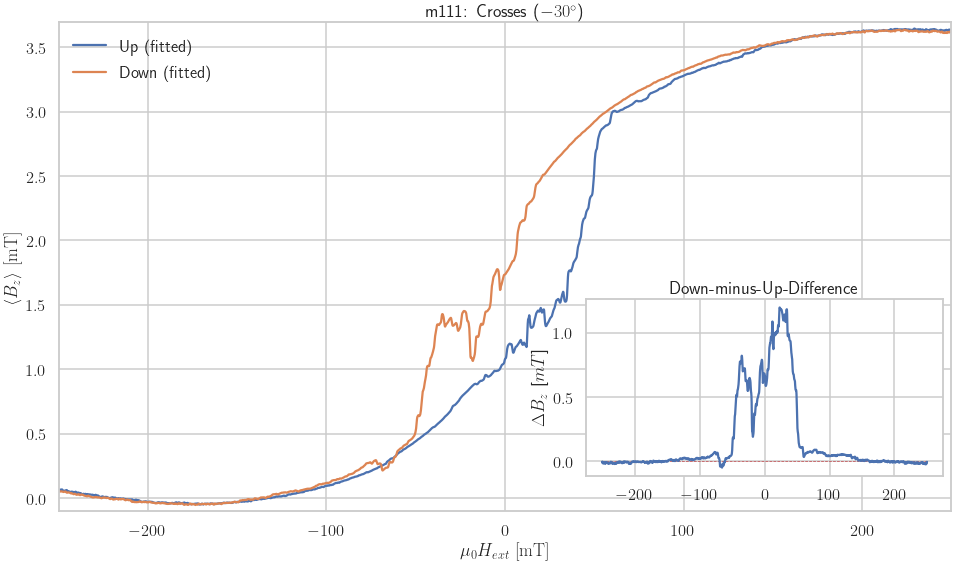

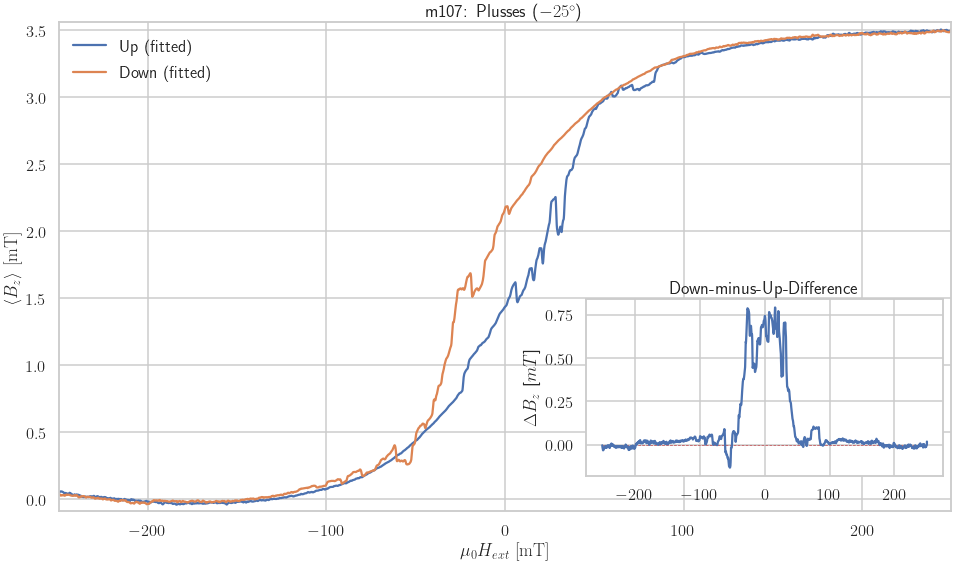

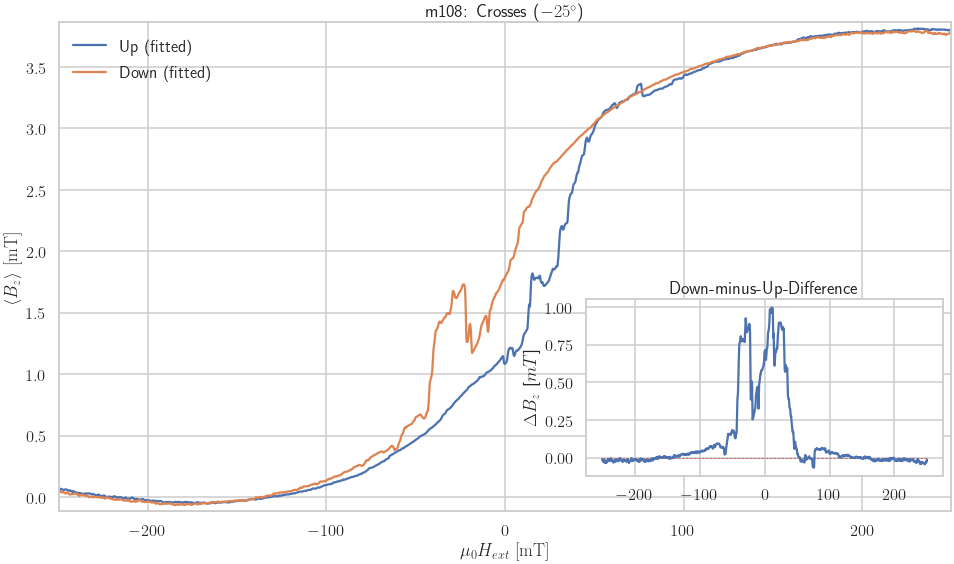

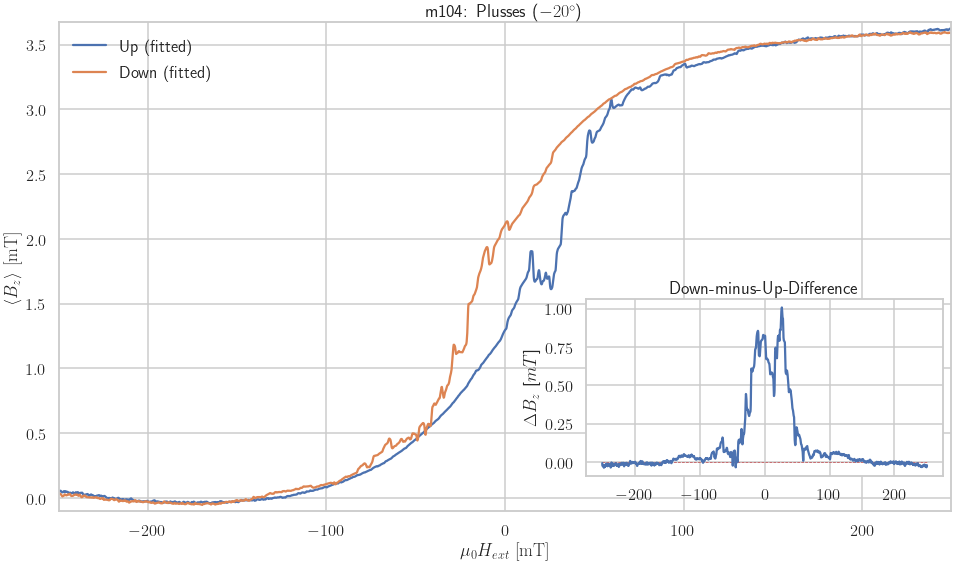

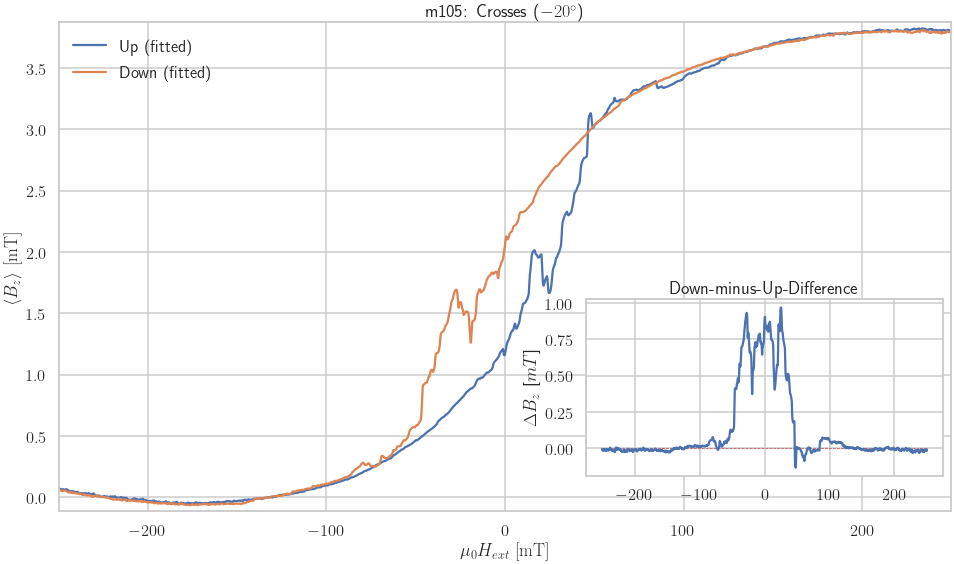

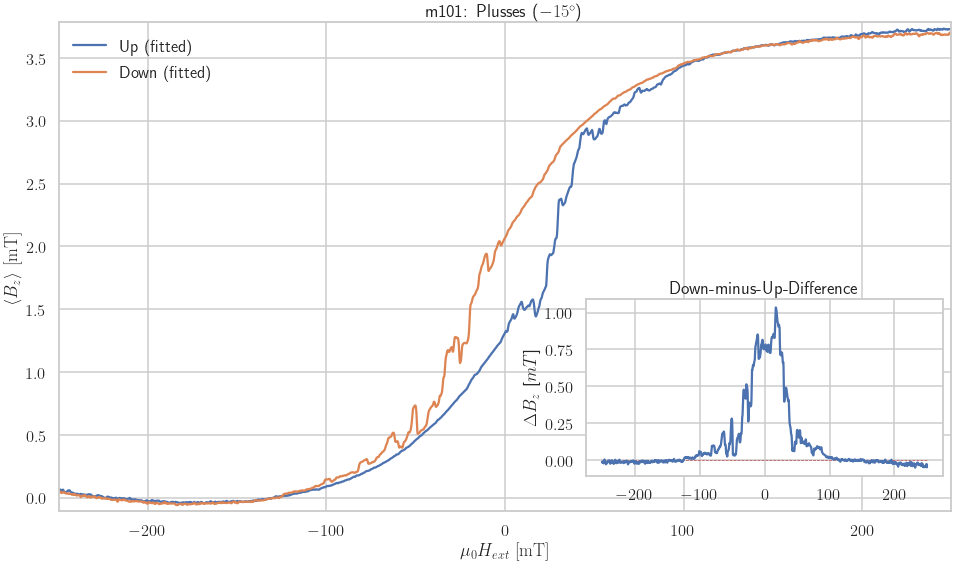

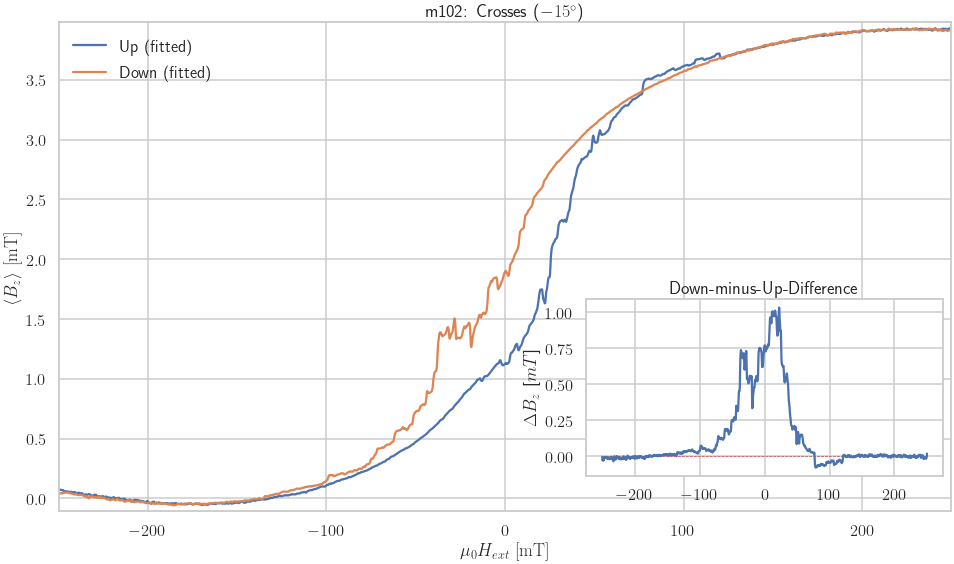

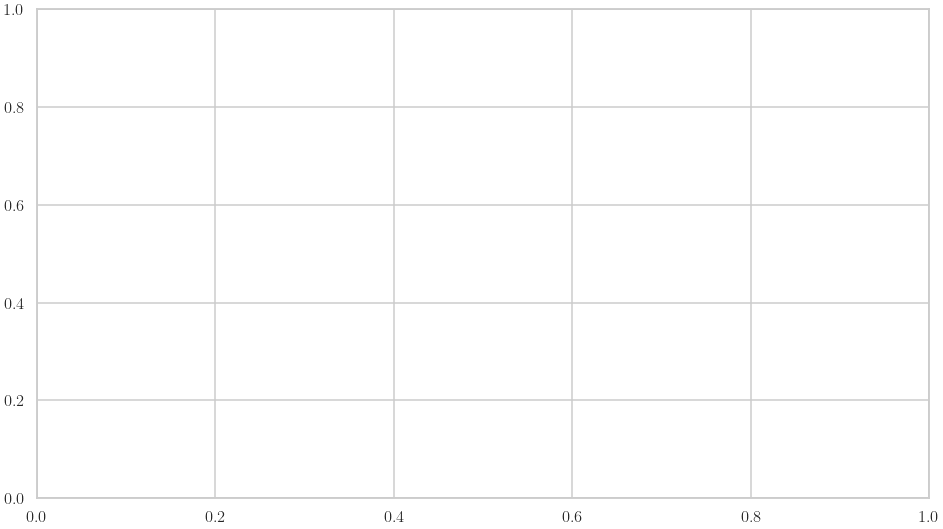

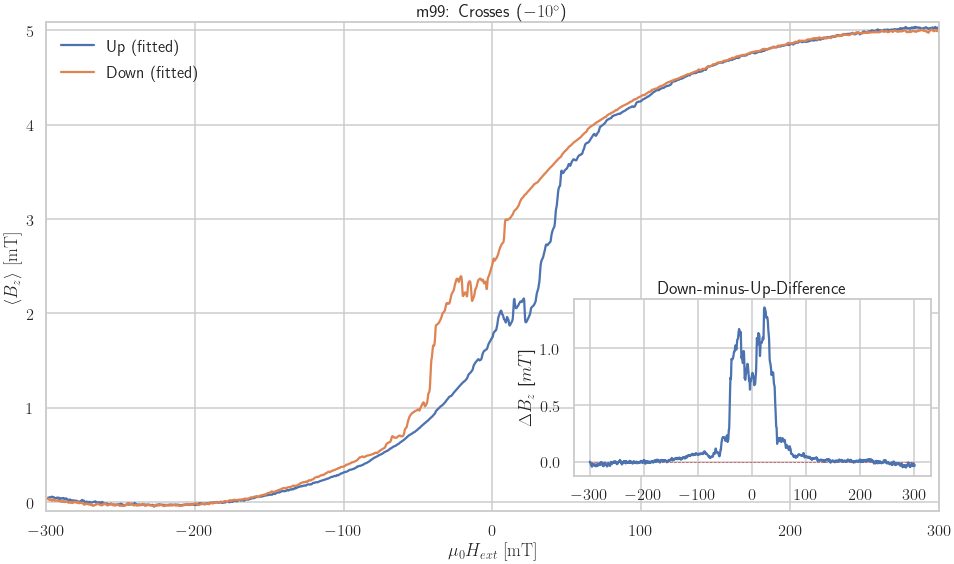

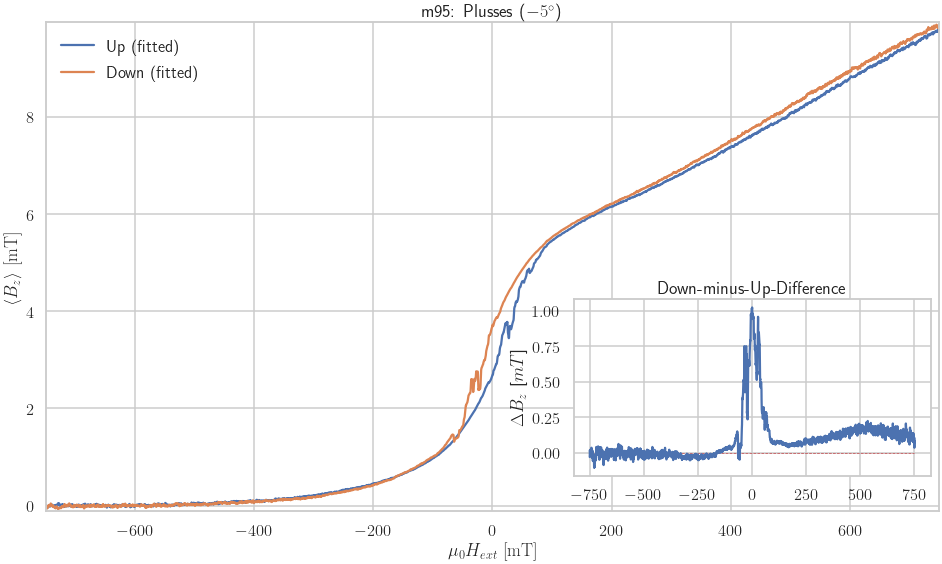

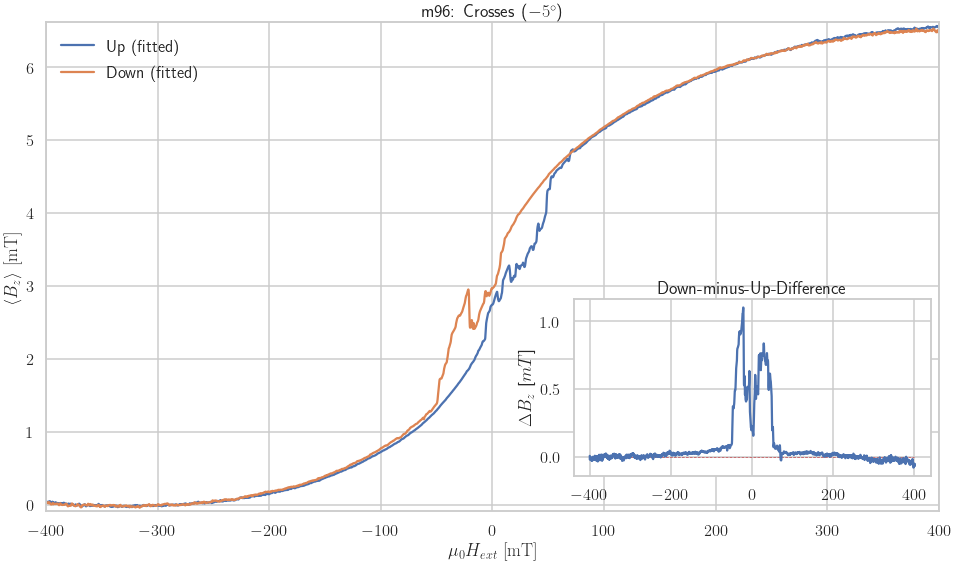

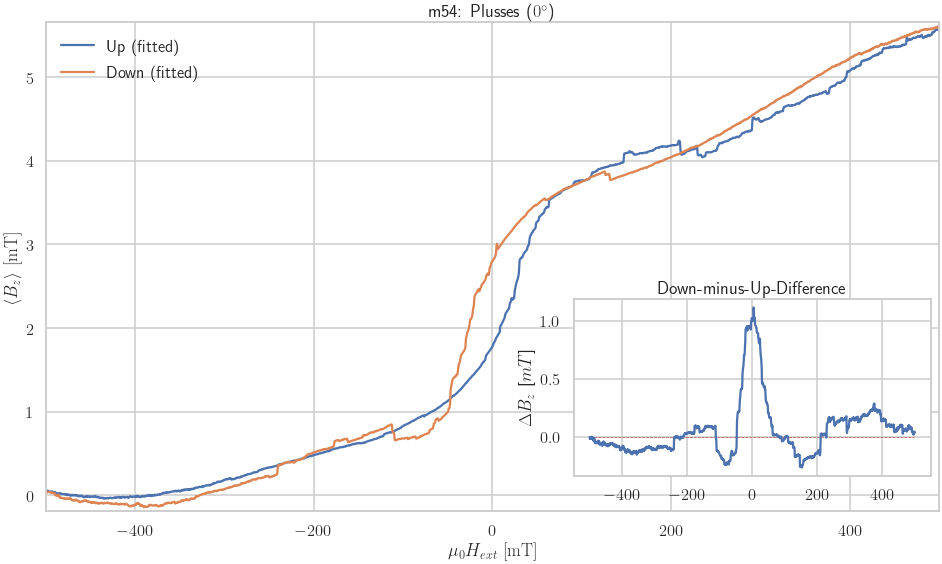

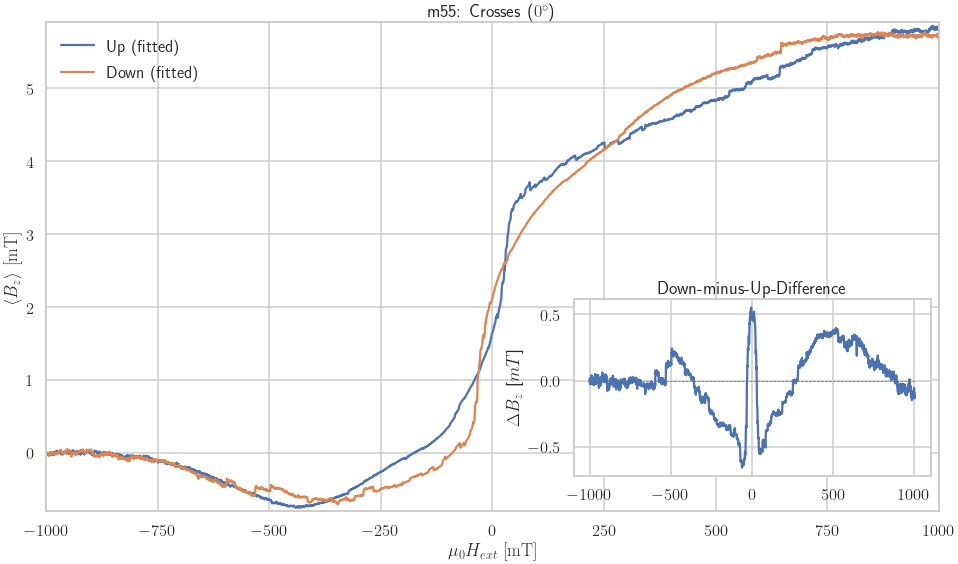

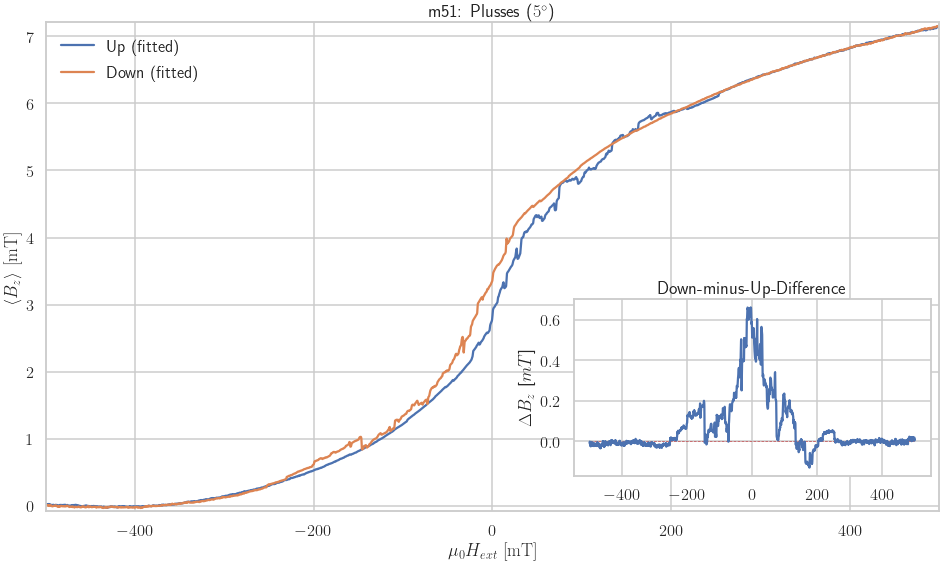

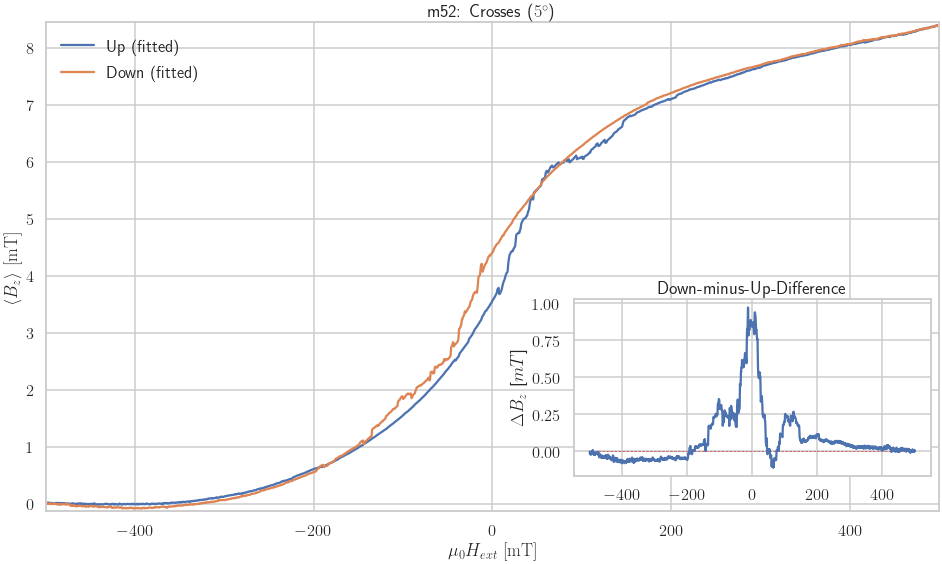

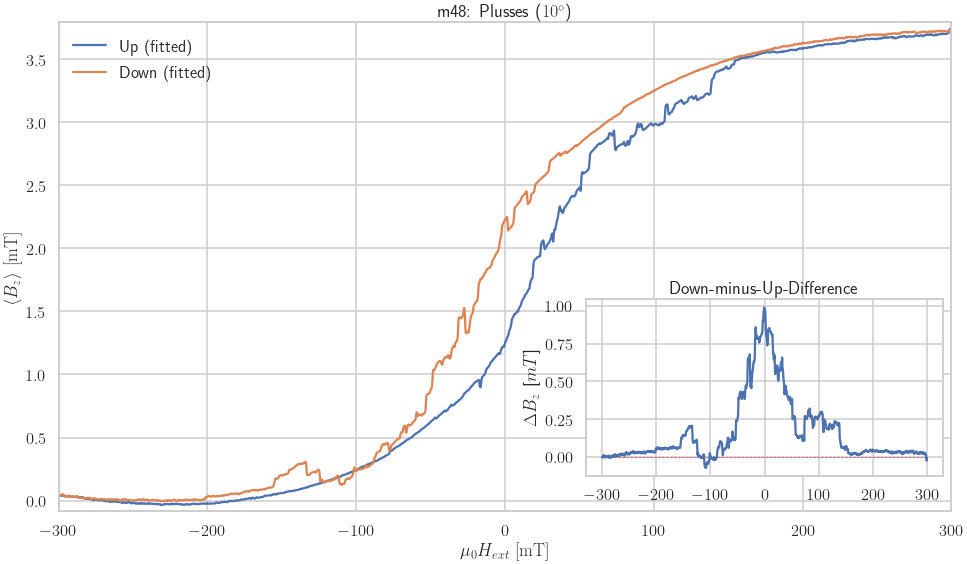

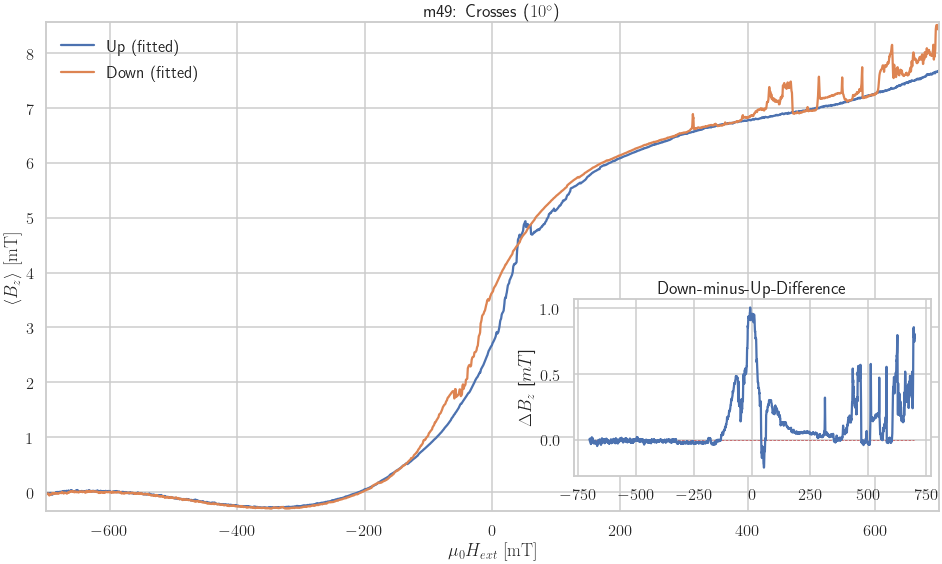

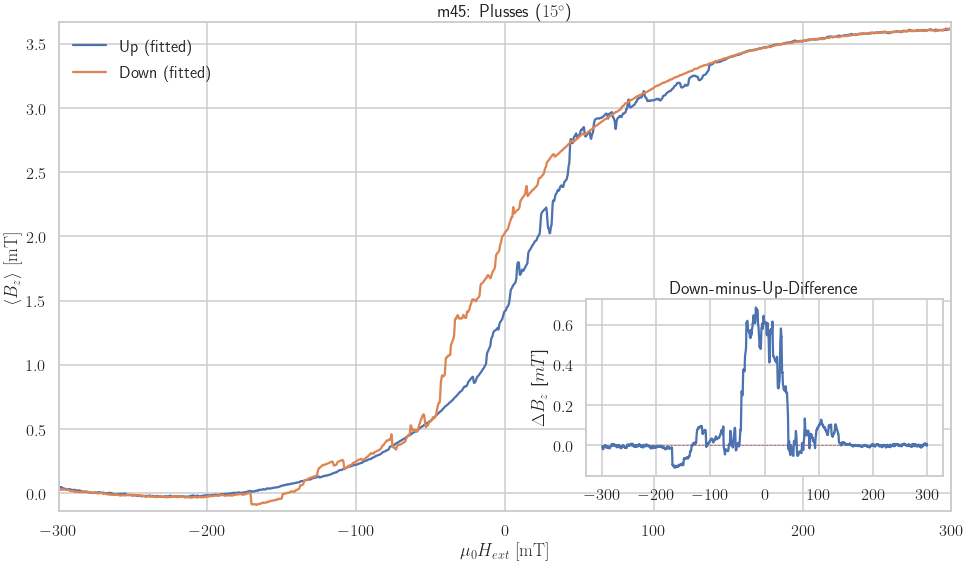

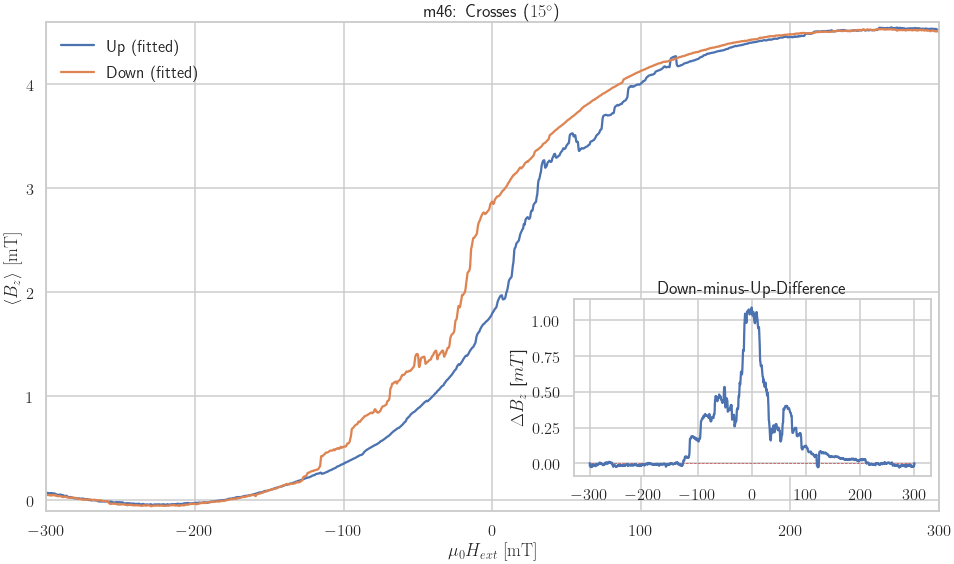

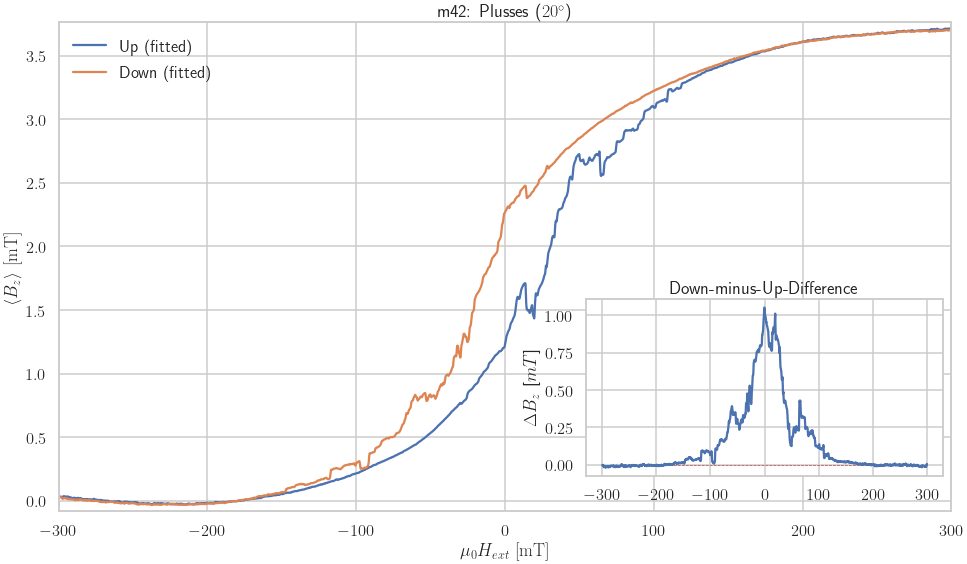

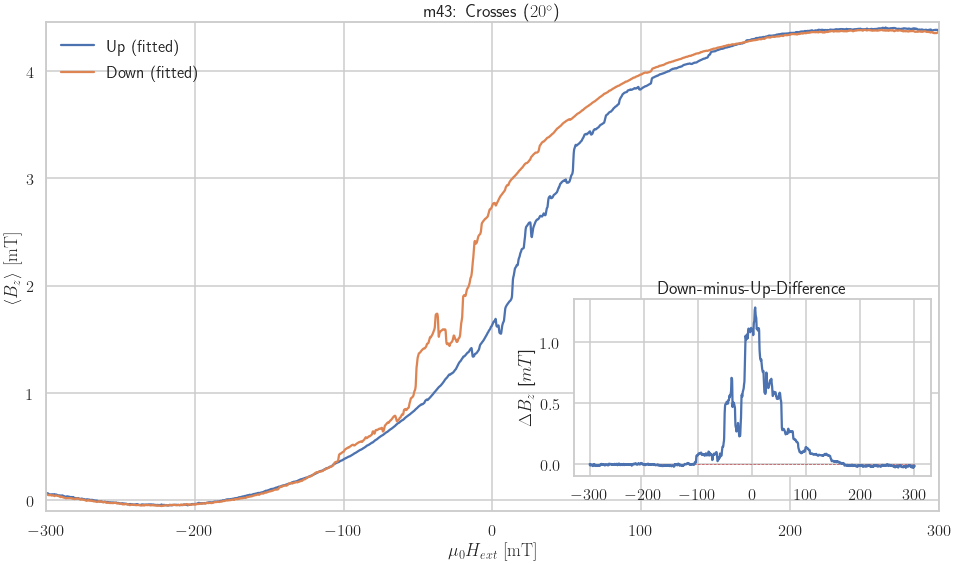

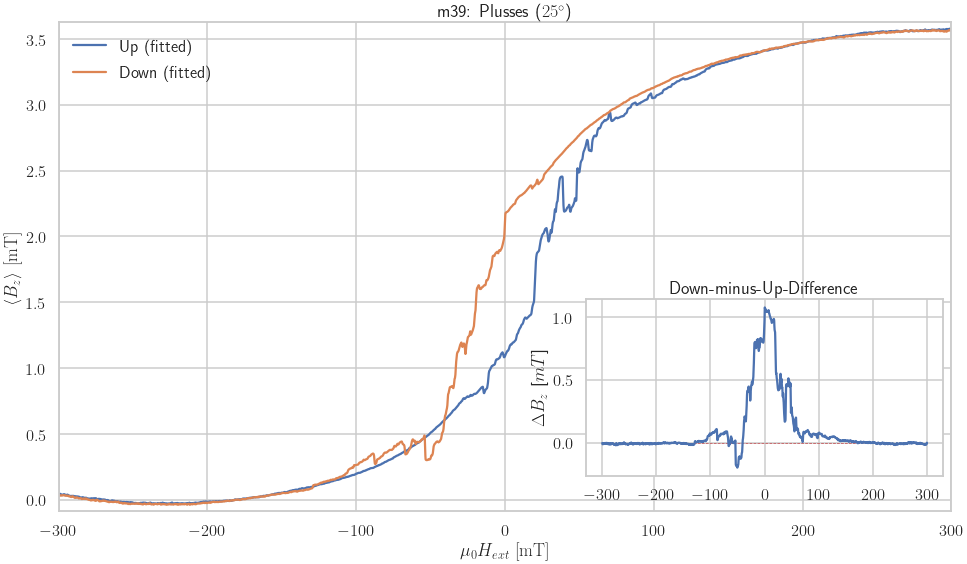

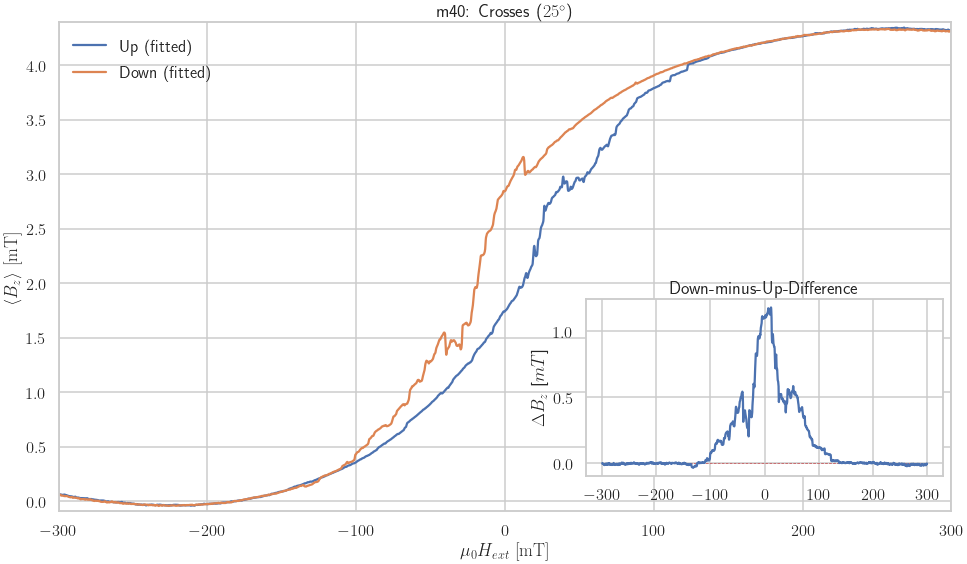

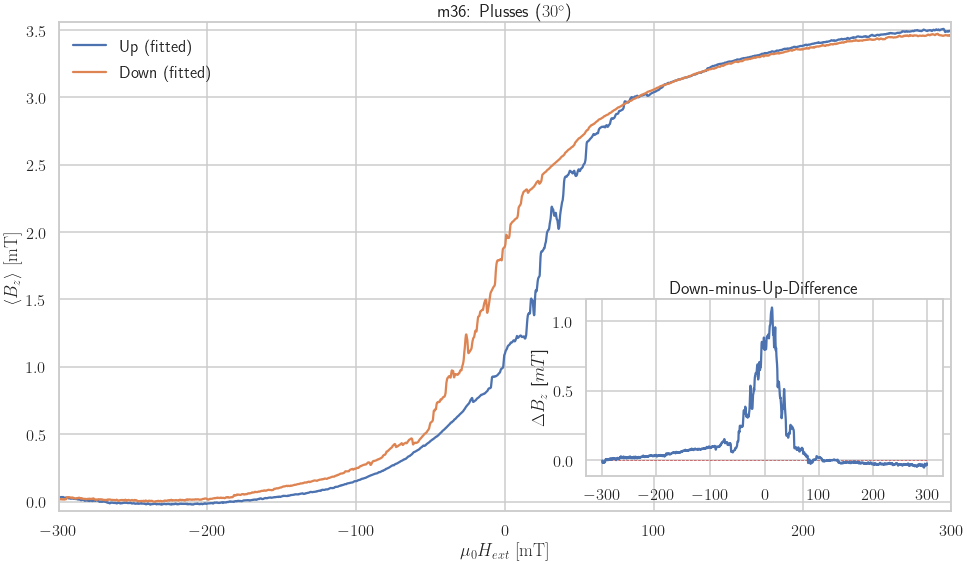

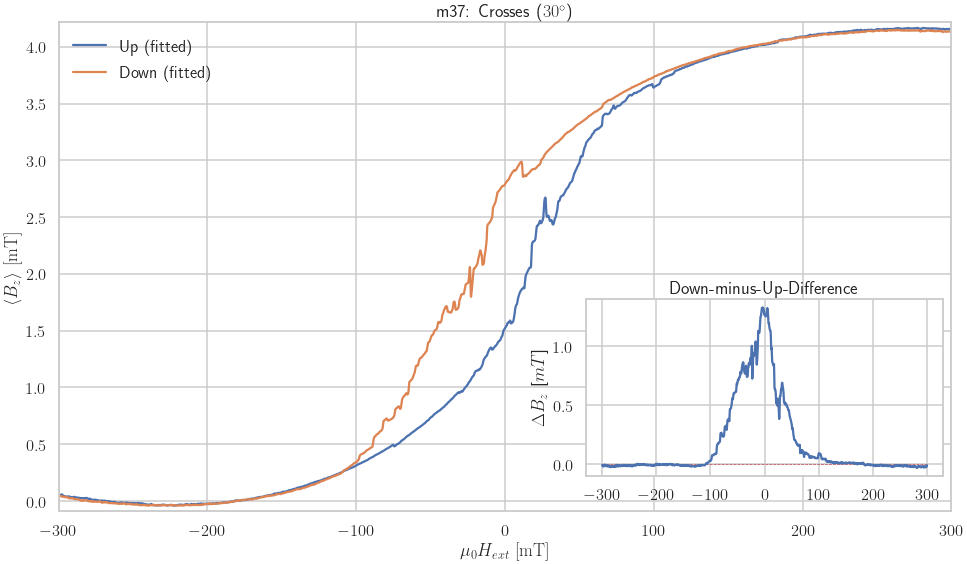

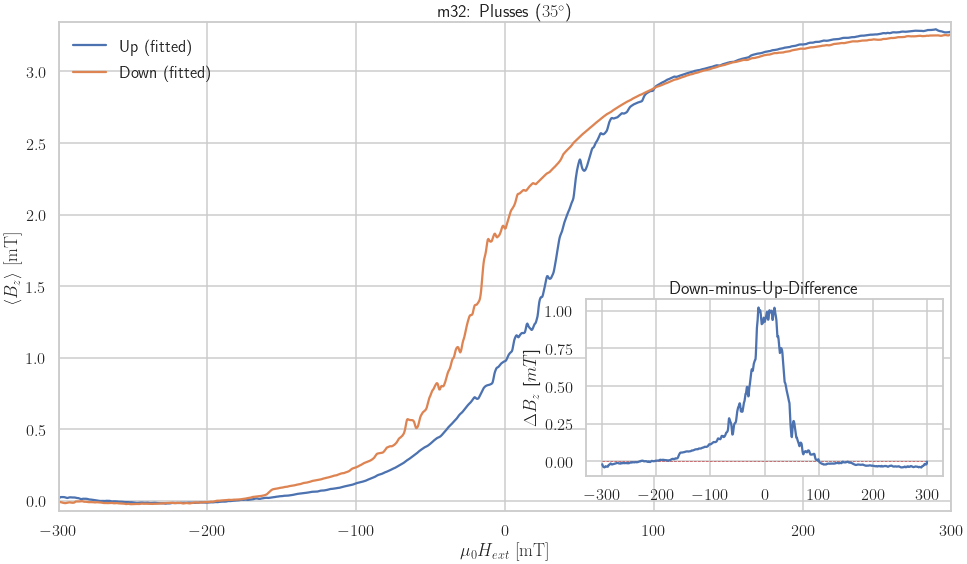

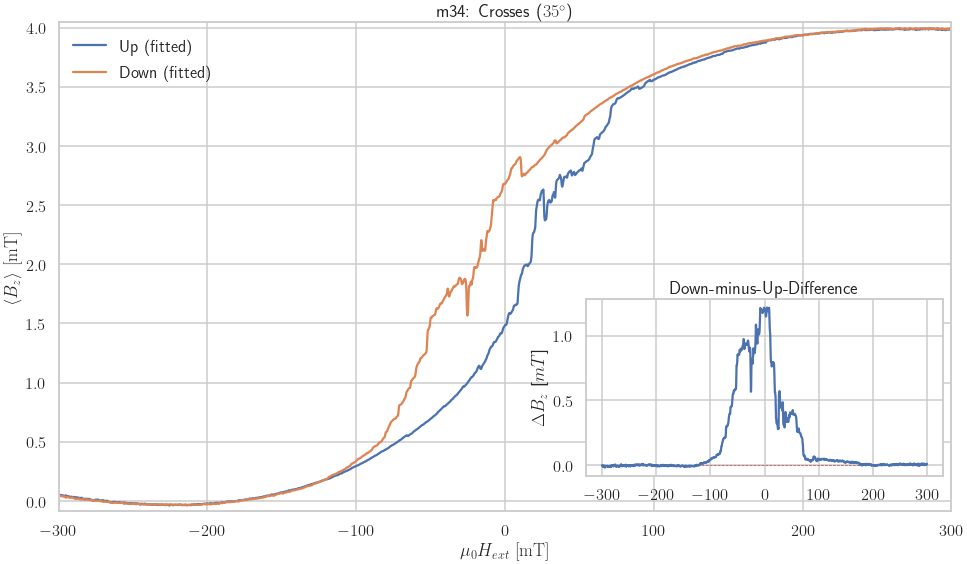

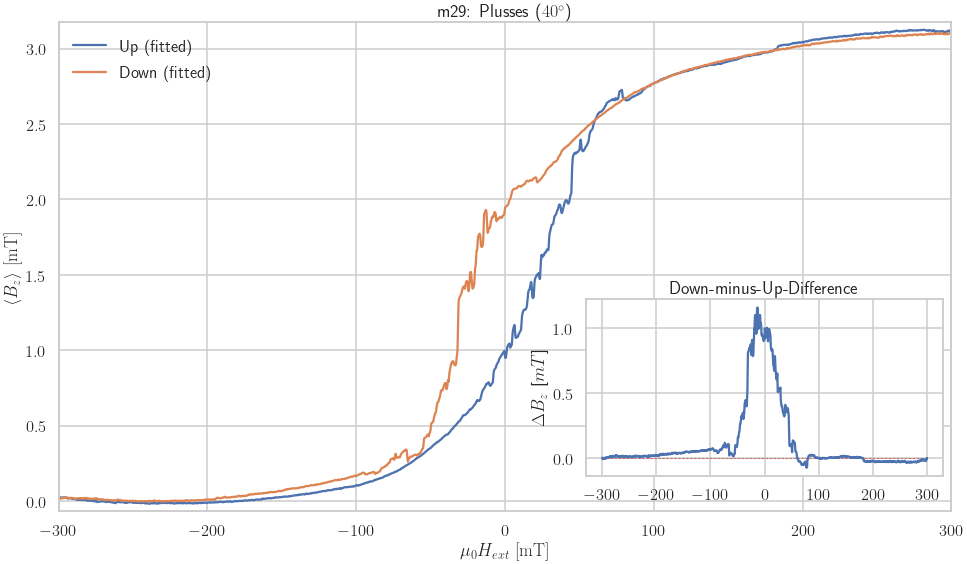

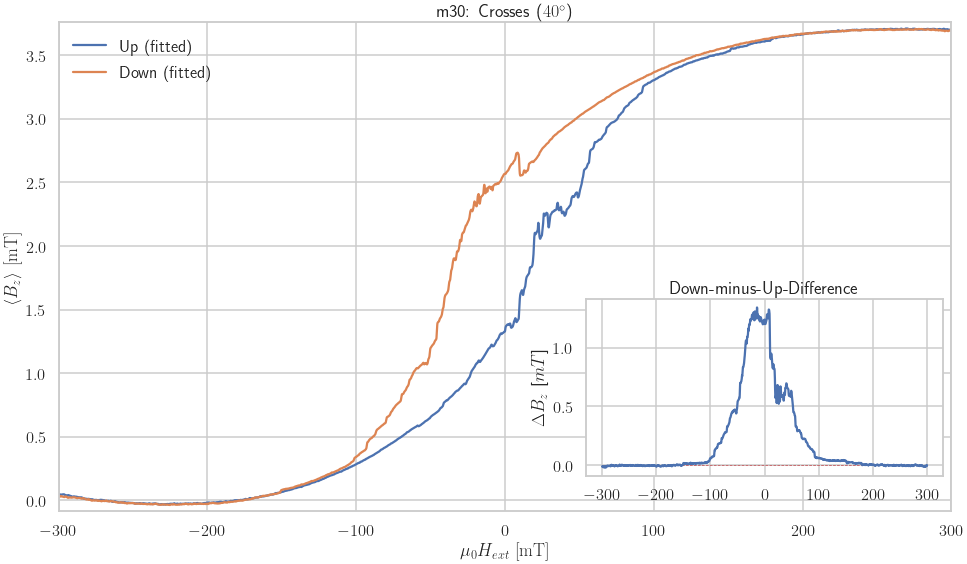

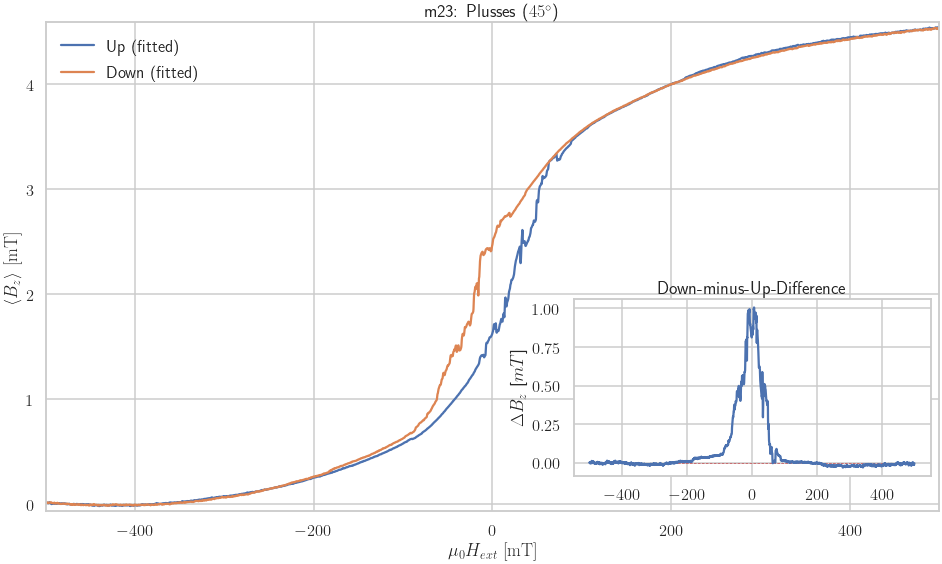

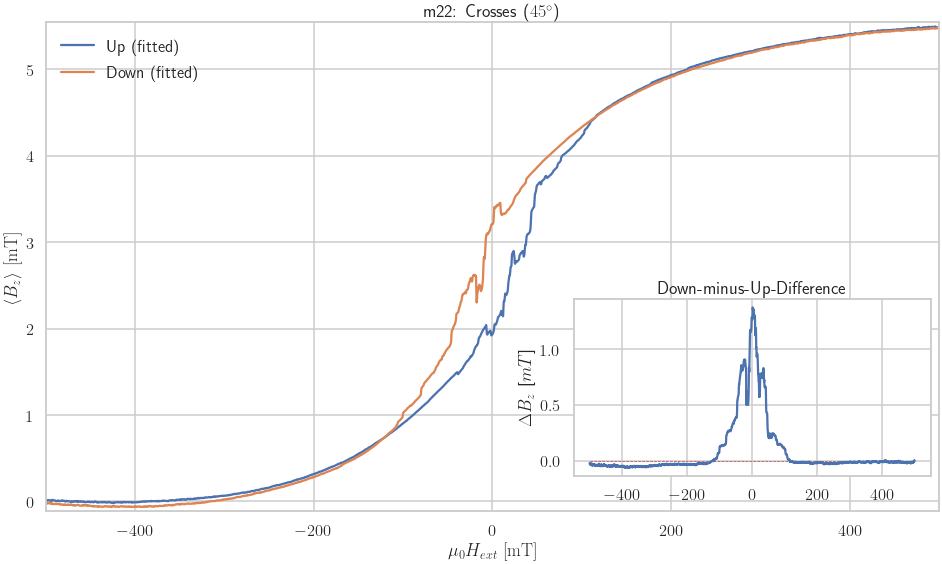

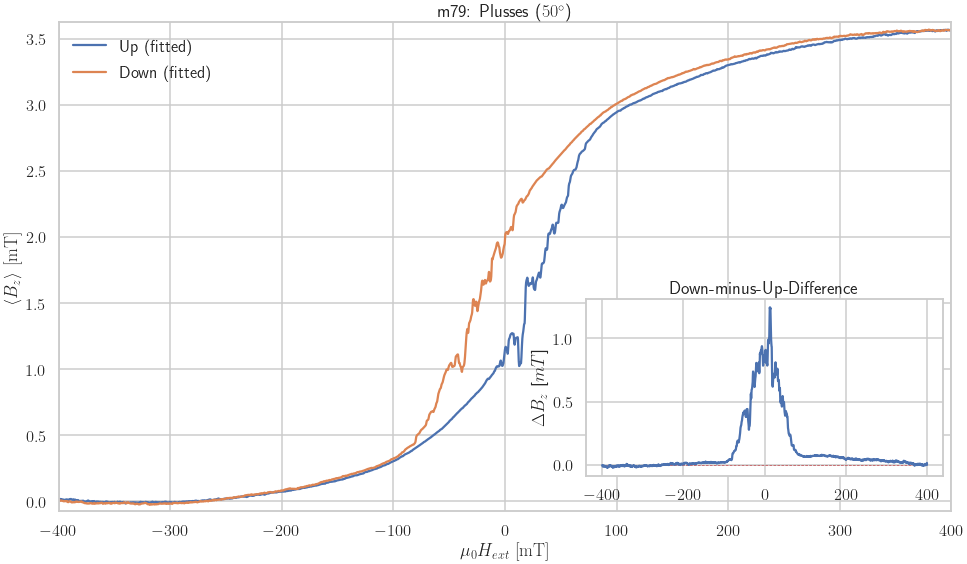

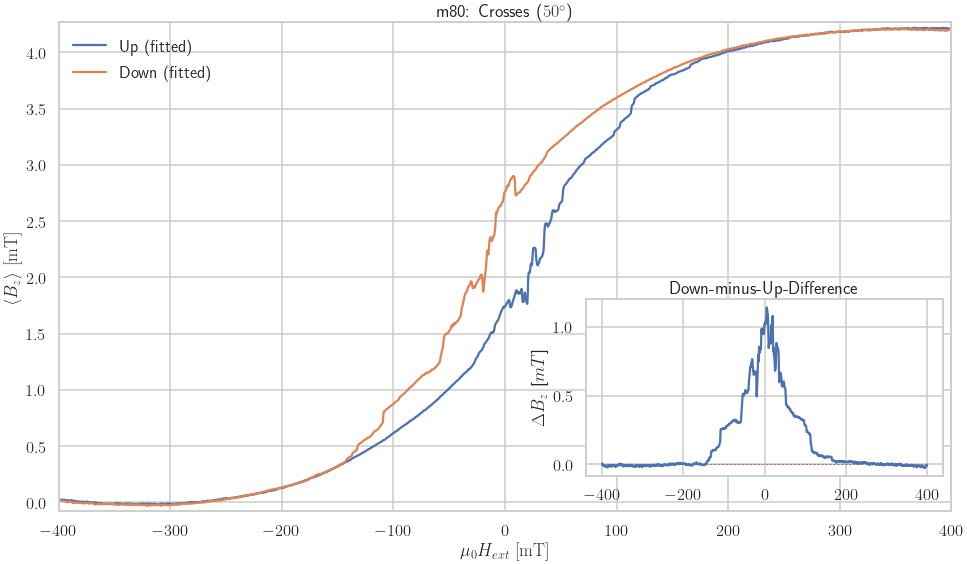

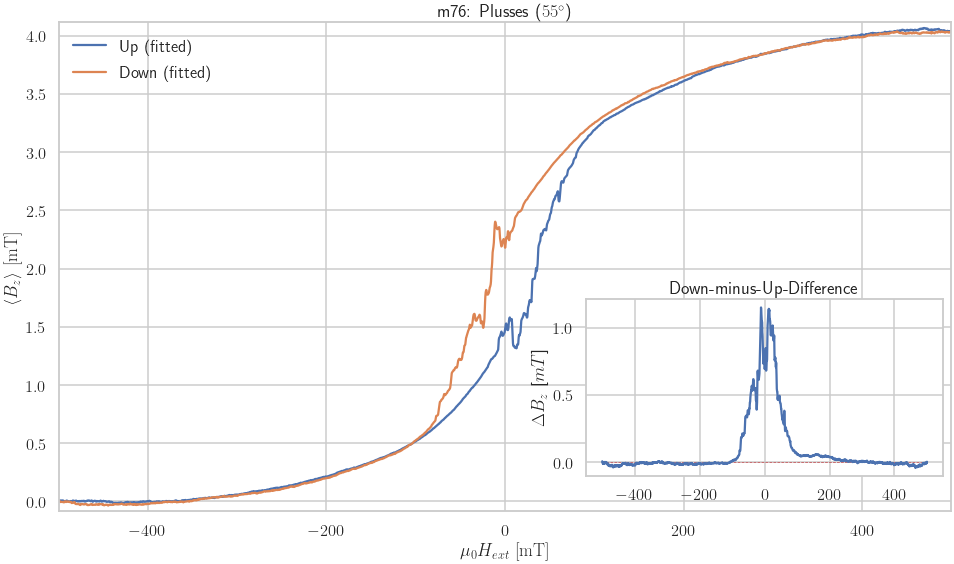

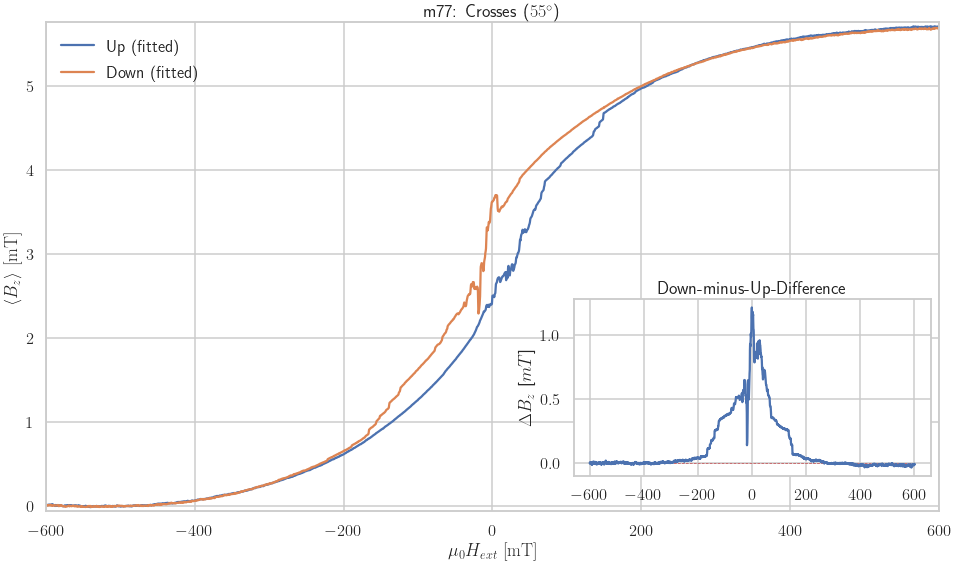

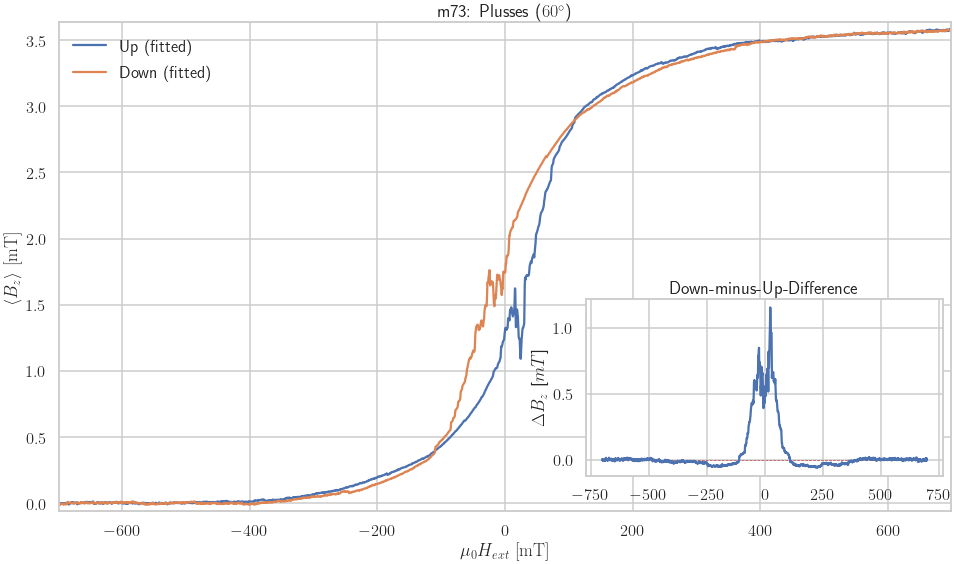

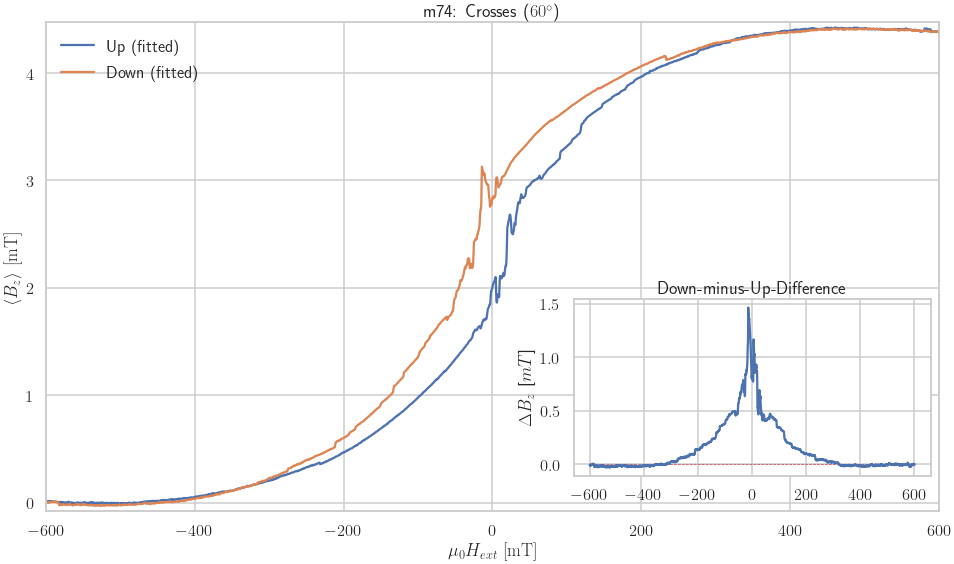

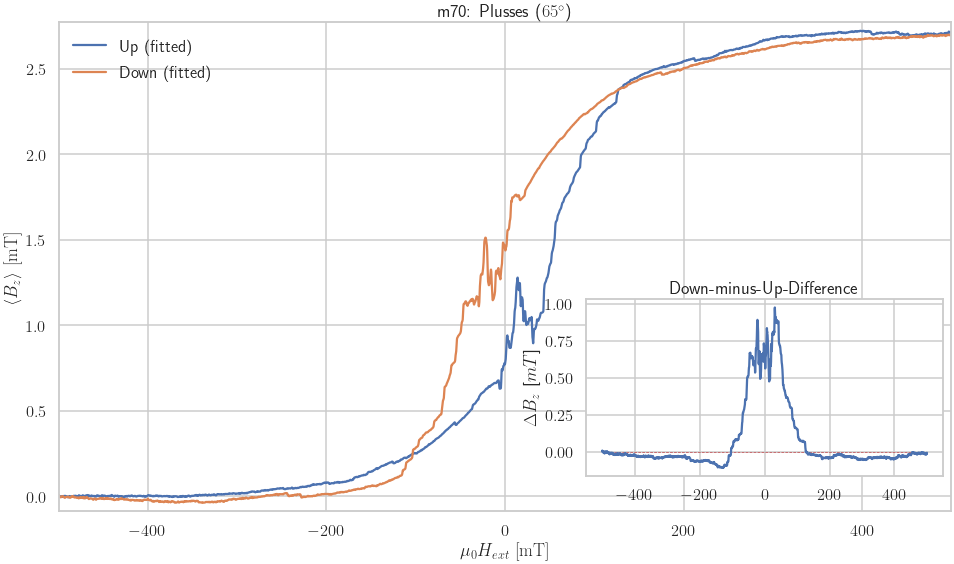

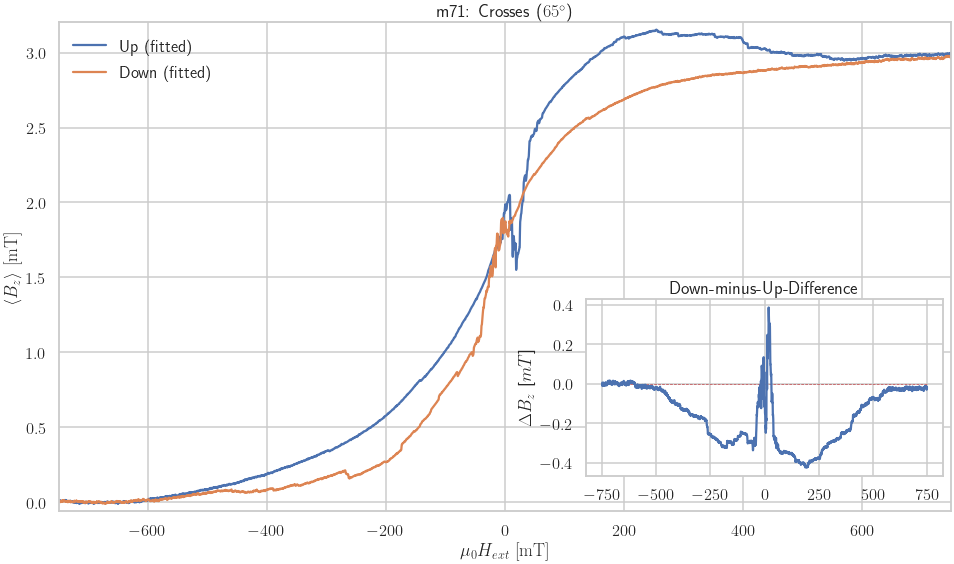

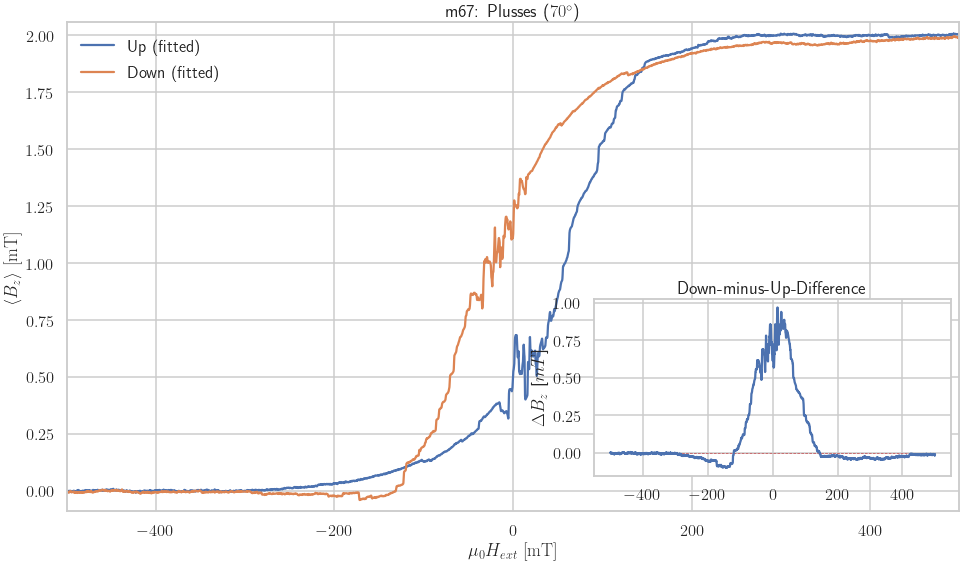

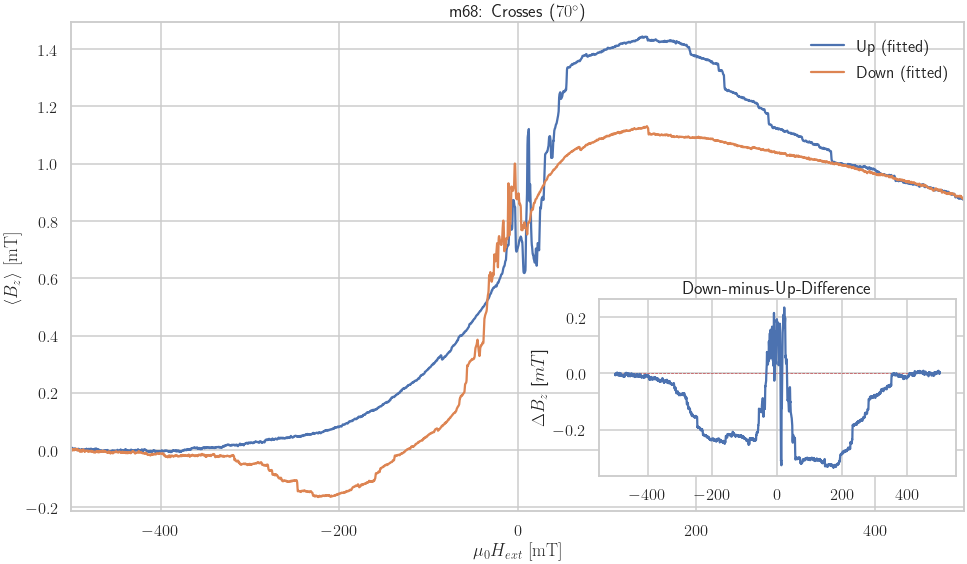

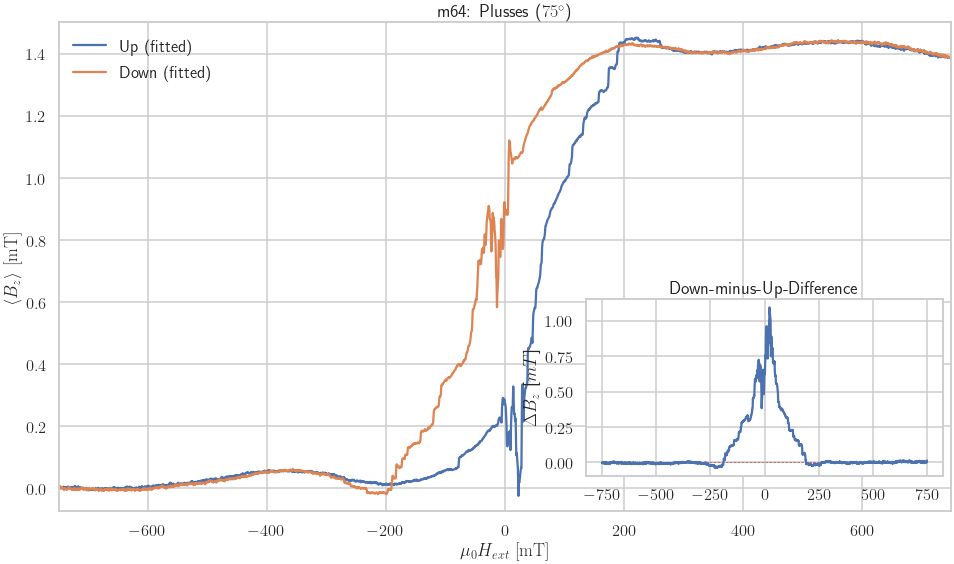

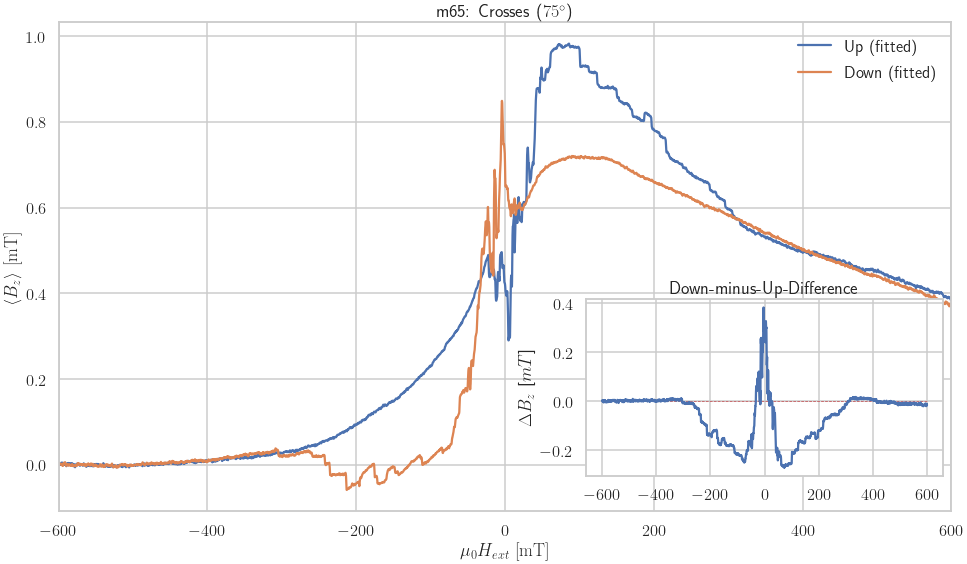

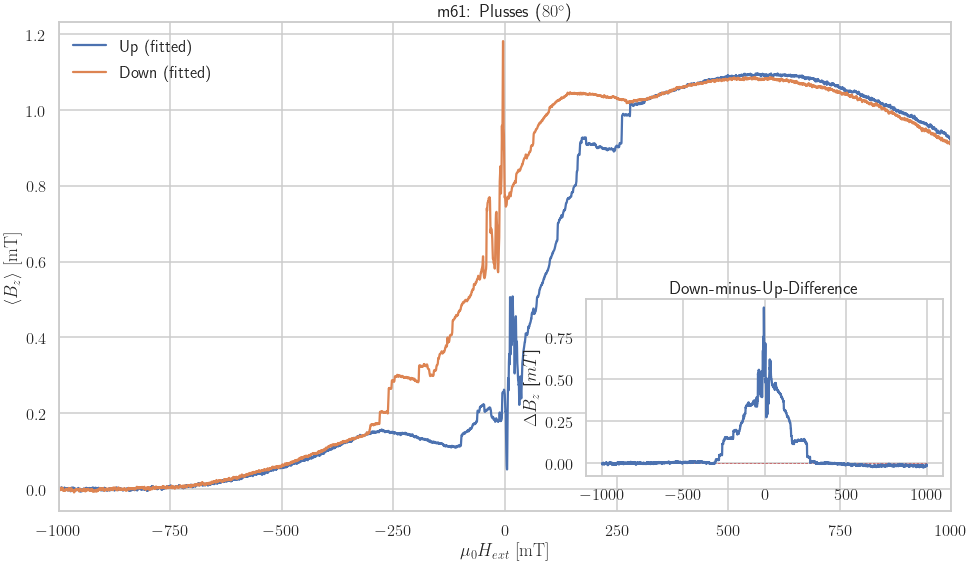

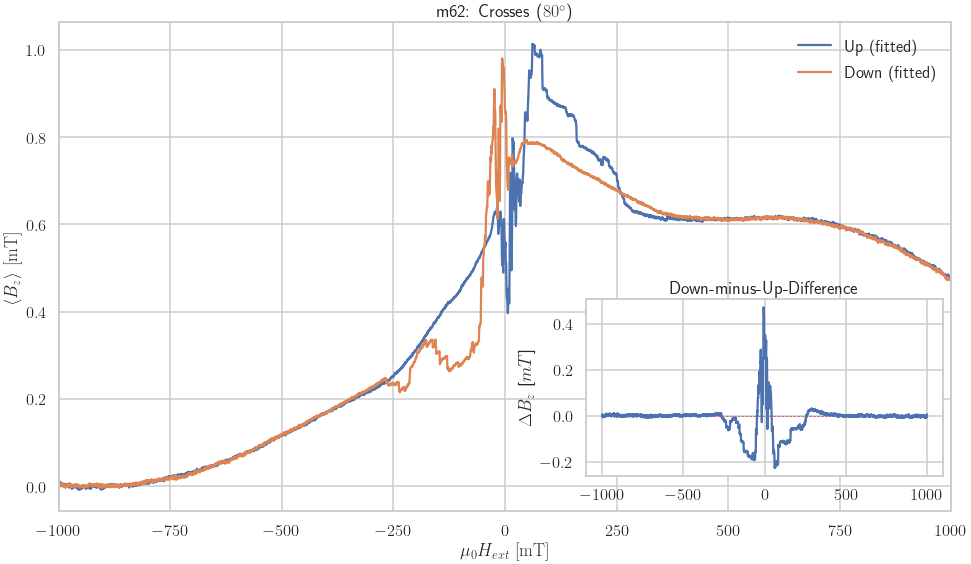

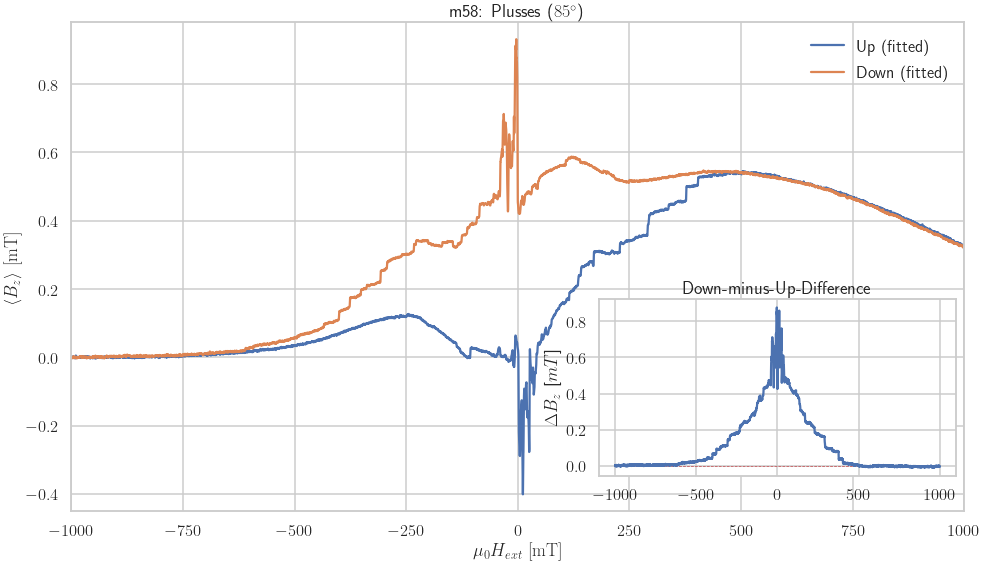

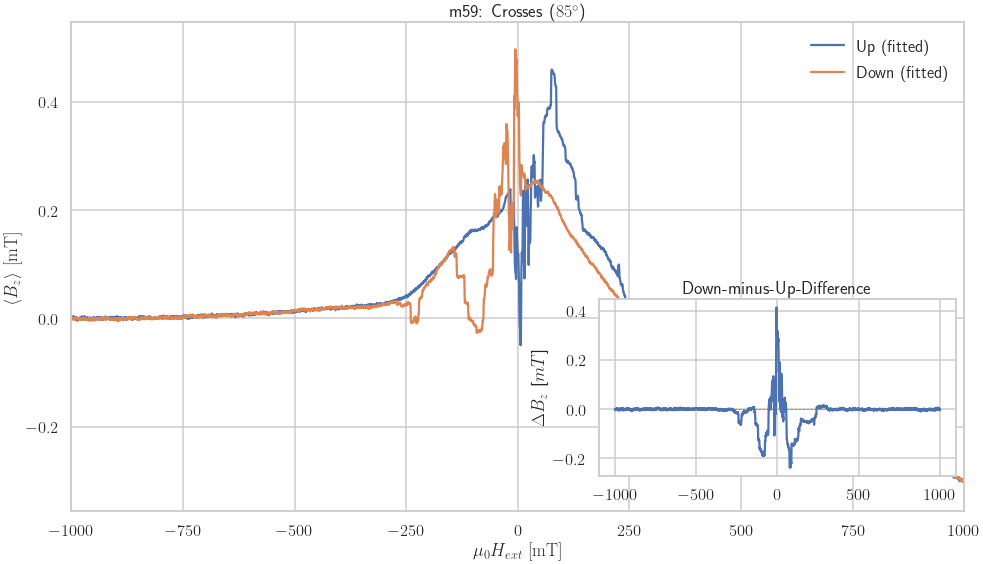

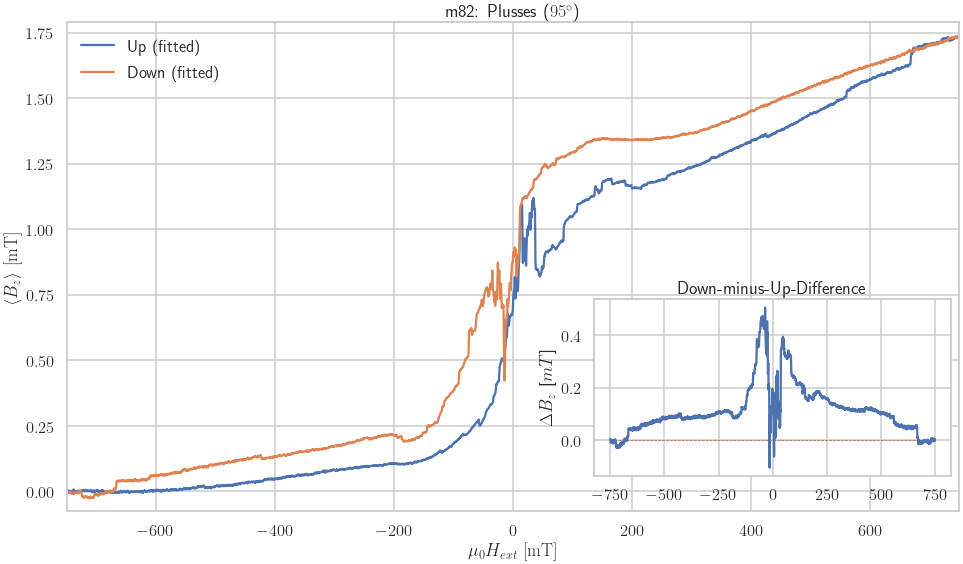

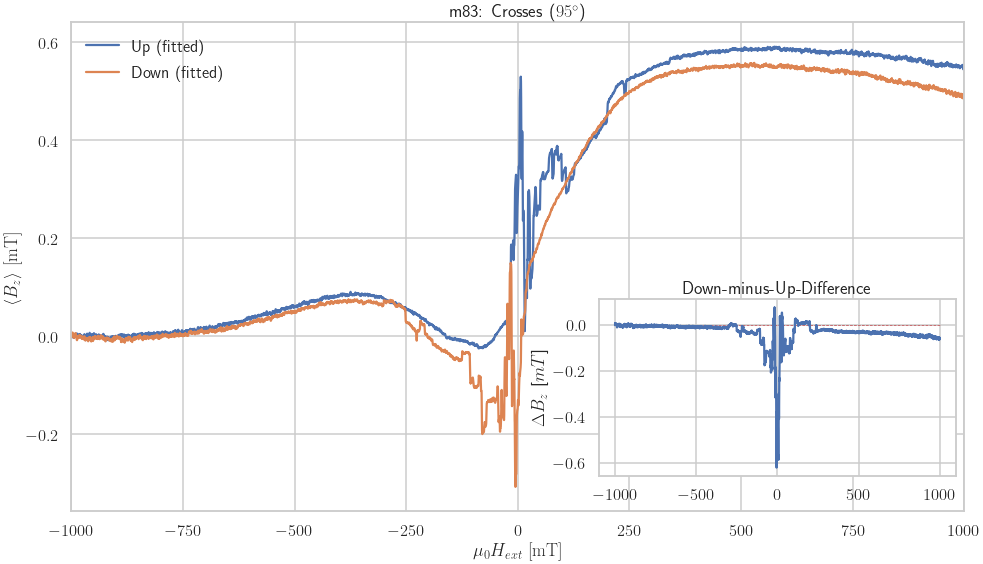

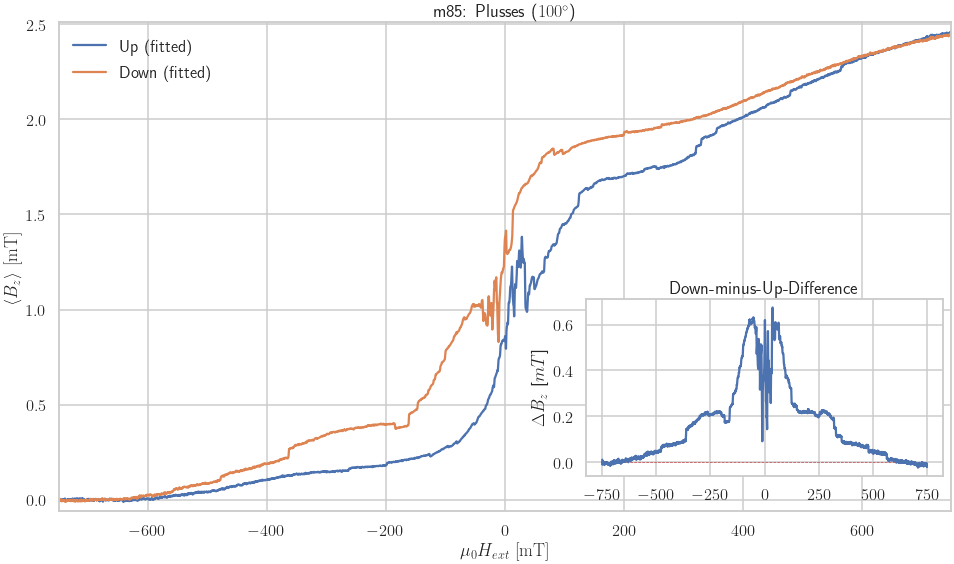

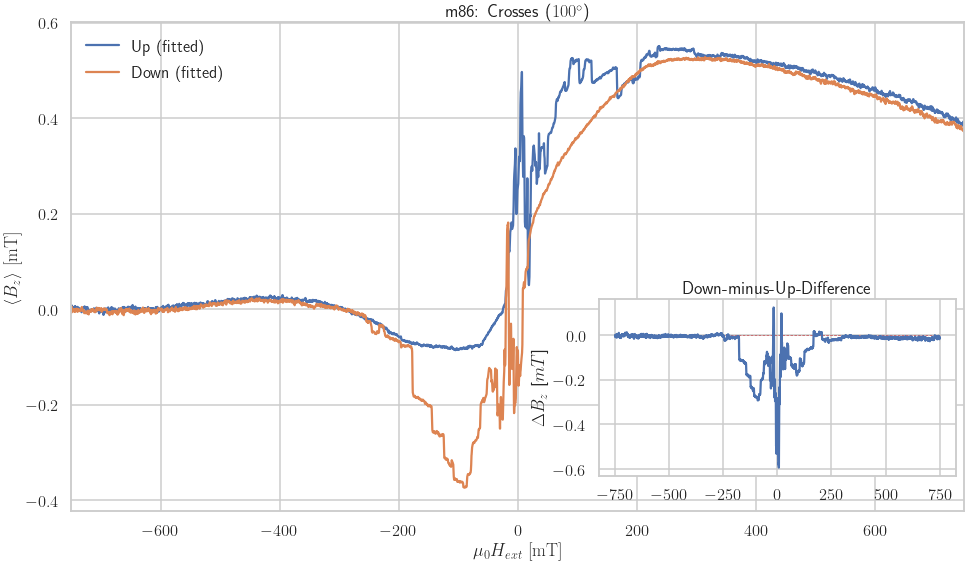

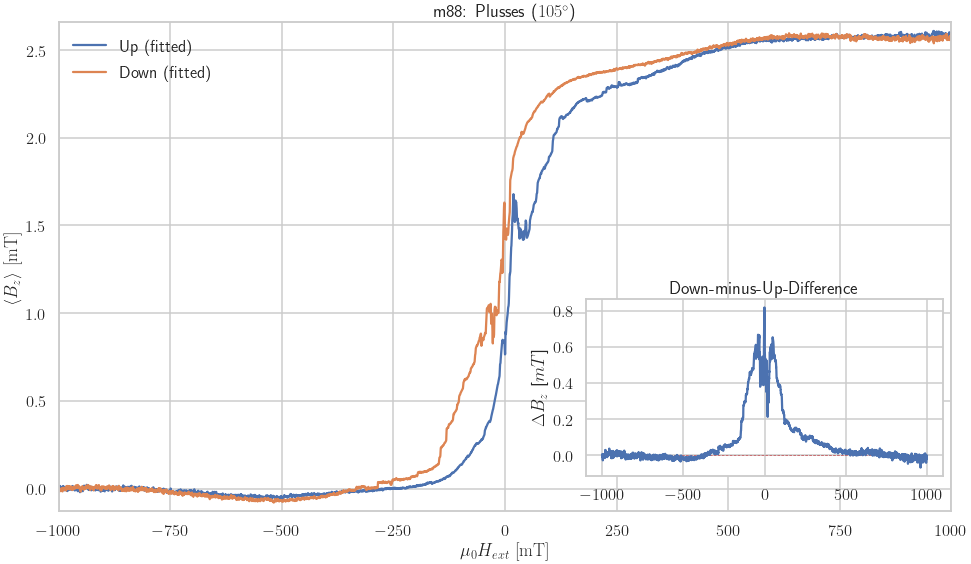

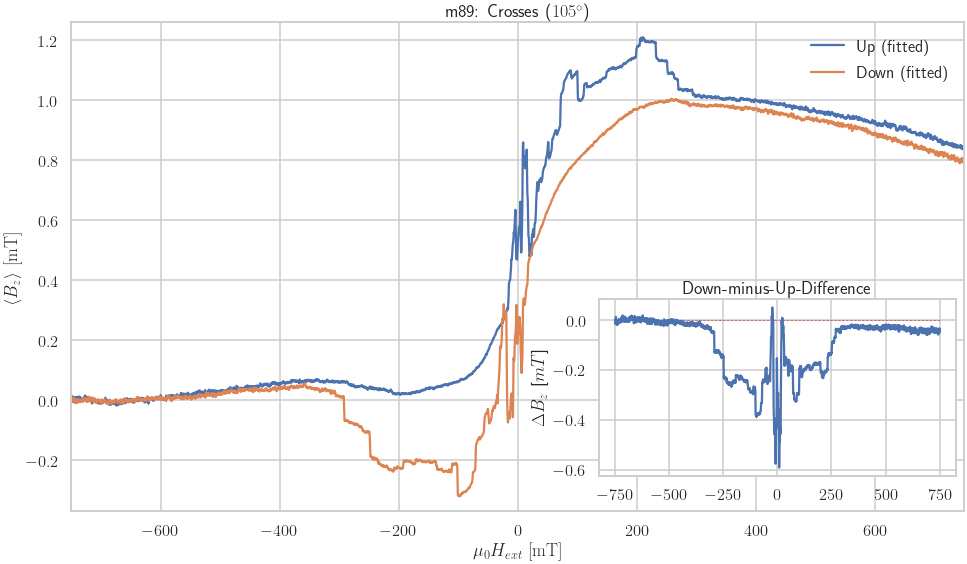

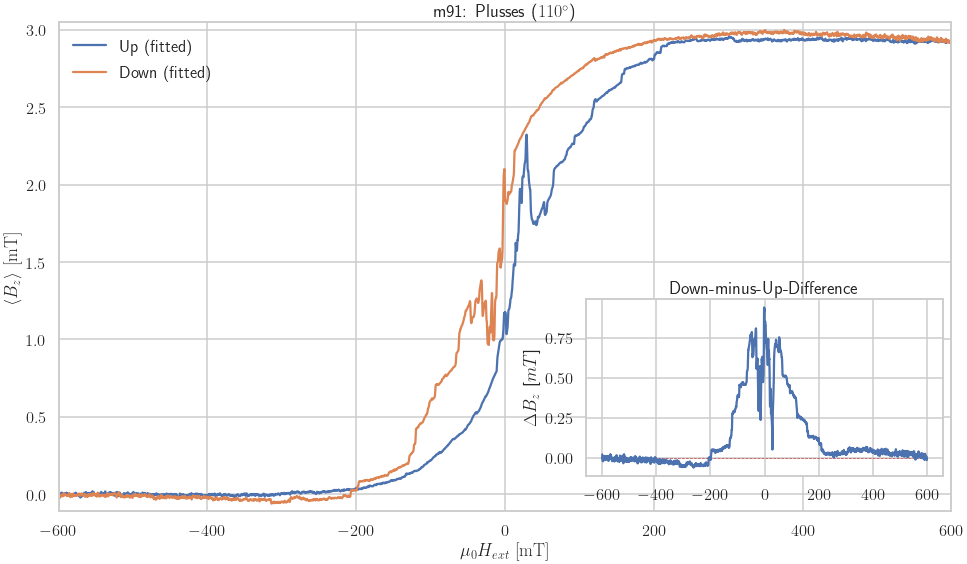

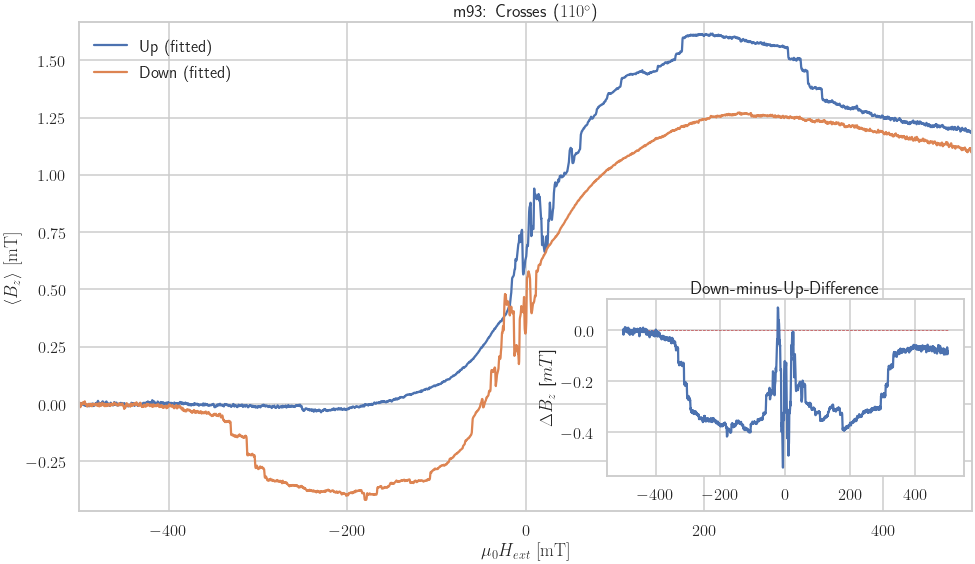

In [12]:
#meas = {}
for nr in all_angles:
    fig, ax = plt.subplots(1, 1, figsize=(16,9))
    meas[nr].style.set_style(default=True)

    try:
        meas[nr].plot_strayfield(ax)
    except:
        continue

    inset = inset_axes(ax, width='100%', height='90%', 
                       bbox_to_anchor=(.6, .05, .4, .4),
                       bbox_transform=ax.transAxes)
    max_b = meas[nr].up.B.max()
    inset.plot([-max_b, max_b], [0, 0], 'r--', linewidth=.75)
    B_ext, B_stray = meas[nr].get_downminusup_strayfield()
    inset.plot(B_ext, B_stray)
    inset.set_ylabel("$\Delta B_z$ [$mT$]")
    inset.set_title("Down-minus-Up-Difference")

    #plt.savefig('plot/m%s_%s_%sdeg.png' % (nr,meas[nr].data['Structure'],meas[nr].data['Angle']))
    #plt.savefig('plot/m%s_%s_%sdeg.pdf' % (nr,meas[nr].data['Structure'],meas[nr].data['Angle']))

## Show Measurement Infos

In [13]:
df = pd.DataFrame({}, index=[], columns=['Type',
                     'Date',
                     'Structure',
                     'Angle',
                     'I1', 
                     'I2', 
                     'Vin', 
                     'R11', 
                     'R12', 
                     'R13', 
                     'R21', 
                     'C11', 
                     'C21', 
                     'T', 
                     'SR',
                     'Vrem1',
                     'Vrem2',
                     'Bcoer1',
                     'Bcoer2'])
for nr, m in meas.items():
    data = m.info

    try:
        m.fit()
    except:
        pass

    try:
        rem1, rem2 = m.get_remanence()
        data['Vrem1'], data['Vrem2'] = rem1.Vx8, rem2.Vx8
    except:
        pass

    try:
        mean, coer1, coer2 = m.get_coercive_field()
        data['V0'], data['Bcoer1'], data['Bcoer2'] = mean, coer1.B, coer2.B
    except:
        pass

    newdf = pd.DataFrame(data, index=[nr])
    if(df.empty):
        df = newdf
    else:
        df = pd.concat([df, newdf])

In [14]:
df

Type               Date Structure Angle    I1   I2   Vin  R11  \
152  Hloop (Gradio)   07.04.2019 01:33   Plusses   -85  1-13  8-6   2.5   1M   
153  Hloop (Gradio)   07.04.2019 10:00   Crosses   -85  2-12  8-6   2.5   1M   
148  Hloop (Gradio)   06.04.2019 12:00   Plusses   -80  1-13  8-6   2.5   1M   
149  Hloop (Gradio)  06.04.2019 17:000   Crosses   -80  2-12  8-6   2.5   1M   
138  Hloop (Gradio)   02.04.2019 19:00   Plusses   -75  1-13  8-6   2.5   1M   
..              ...                ...       ...   ...   ...  ...   ...  ...   
86   Hloop (Gradio)   24.03.2019 14:00   Crosses   100  2-12  8-6   2.5   1M   
88    None (Gradio)                NaN   Plusses   105  1-13  8-6  2.5V  1MO   
89    None (Gradio)                NaN   Crosses   105  1-13  8-6  2.5V  1MO   
91   Hloop (Gradio)   25.03.2019 14:00   Plusses   110  1-13  8-6   2.5   1M   
93   Hloop (Gradio)   25.03.2019 22:00   Crosses   110  1-13  8-6   2.5   1M   

       R12 R13  ...  deg  type1   dir   type2      date  time  GBIP8      B  \
152   7.5k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
153     4k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
148  8.25k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
149  3.75k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
138     2k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
..     ...  ..  ...  ...    ...   ...     ...       ...   ...    ...    ...   
86   2.25k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
88     NaN   0  ...  105  Hloop    up  Gradio  20190324  2000   14-7     1T   
89     NaN   0  ...  105  Hloop  down  Gradio  20190325  0800   14-7  0.75T   
91   5.15k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   
93   2.25k   0  ...  NaN    NaN   NaN     NaN       NaN   NaN    NaN    NaN   

     gate     R1  
152   NaN    NaN  
153   NaN    NaN  
148   NaN    NaN  
149   NaN    NaN  
138   NaN    NaN  
..    ...    ...  
86    NaN    NaN  
88     0V  2.6kO  
89     0V  1.4kO  
91    NaN    NaN  
93    NaN    NaN  

[78 rows x 33 columns]